In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import timeit
from sklearn.metrics import mean_squared_error
import math
import spgl1 as spgl1
from sklearn.linear_model import orthogonal_mp
import pywt
from data_matrices import *
from sys import getsizeof
#import DLIPsim as dlip
import inspect
from pprint import pprint
import warnings
import h5py
from cs_utils import *
from matplotlib import ticker

warnings.filterwarnings('ignore')

In [29]:
#'undersampling-freq-db2-haar-sym2-arrays-snr=-10-db.hdf5'
#'undersampling-position-db2-haar-sym2-arrays-snr=-10-db.hdf5'
snr = [-30,-20,-10,0,10,20,30,40]
#snr = [-20,-10]
dir_files = 'hdf5-files-high-stats'#'hdf5-files'
dir_files0 = 'hdf5-files'
str_position_aux = '%s/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files,-10)
str_freq_aux = '%s/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files,-10)
str_combined_aux = '%s/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files,-10)
#file_hf5 = filename
#hf = h5py.File(file_hf5, 'r')
#with h5py.File(file_hf5, 'r') as f:
#    g = f.visit(print)
#percentage = np.array(hf['percentage'])
percentage = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45, \
                       0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.])
#print(percentage)
print(str_position_aux)
print(str_freq_aux)

hdf5-files-high-stats/undersampling-position-db2-haar-sym2-arrays-snr=-10-db.hdf5
hdf5-files-high-stats/undersampling-freq-db2-haar-sym2-arrays-snr=-10-db.hdf5


In [30]:
def GetArrays(filename):
    file_hf5 = filename
    hf = h5py.File(file_hf5, 'r')
    #with h5py.File(file_hf5, 'r') as f:
    #    g = f.visit(print)
    percentage = np.array(hf['percentage'])
    
    psnr_omp_db2 = np.array(hf['psnr-omp-db2'])
    error_psnr_omp_db2 = np.array(hf['error-psnr-omp-db2'])
    rmse_omp_module_db2 = np.array(hf['rmse-omp-module-db2'])
    rmse_omp_error_module_db2 = np.array(hf['rmse-omp-error-module-db2'])
    rmse_omp_phase_db2 = np.array(hf['rmse-omp-phase-db2'])
    rmse_omp_error_phase_db2 = np.array(hf['rmse-omp-error-phase-db2'])

    psnr_omp_haar = np.array(hf['psnr-omp-haar'])
    error_psnr_omp_haar = np.array(hf['error-psnr-omp-haar'])
    rmse_omp_module_haar = np.array(hf['rmse-omp-module-haar'])
    rmse_omp_error_module_haar = np.array(hf['rmse-omp-error-module-haar'])
    rmse_omp_phase_haar = np.array(hf['rmse-omp-phase-haar'])
    rmse_omp_error_phase_haar = np.array(hf['rmse-omp-error-phase-haar'])

    psnr_omp_sym2 = np.array(hf['psnr-omp-sym2'])
    error_psnr_omp_sym2 = np.array(hf['error-psnr-omp-sym2'])
    rmse_omp_module_sym2 = np.array(hf['rmse-omp-module-sym2'])
    rmse_omp_error_module_sym2 = np.array(hf['rmse-omp-error-module-sym2'])
    rmse_omp_phase_sym2 = np.array(hf['rmse-omp-phase-sym2'])
    rmse_omp_error_phase_sym2 = np.array(hf['rmse-omp-error-phase-sym2'])

    psnr_spgl1_db2 = np.array(hf['psnr-spgl1-db2'])
    error_psnr_spgl1_db2 = np.array(hf['error-psnr-spgl1-db2'])
    rmse_spgl1_module_db2 = np.array(hf['rmse-spgl1-module-db2'])
    rmse_spgl1_error_module_db2 = np.array(hf['rmse-spgl1-error-module-db2'])
    rmse_spgl1_phase_db2 = np.array(hf['rmse-slpgl1-phase-db2'])
    rmse_spgl1_error_phase_db2 = np.array(hf['rmse-spgl1-error-phase-db2'])

    psnr_spgl1_haar = np.array(hf['psnr-spgl1-haar'])
    error_psnr_spgl1_haar = np.array(hf['error-psnr-spgl1-haar'])
    rmse_spgl1_module_haar = np.array(hf['rmse-spgl1-module-haar'])
    rmse_spgl1_error_module_haar = np.array(hf['rmse-spgl1-error-module-haar'])
    rmse_spgl1_phase_haar = np.array(hf['rmse-slpgl1-phase-haar'])
    rmse_spgl1_error_phase_haar = np.array(hf['rmse-spgl1-error-phase-haar'])

    psnr_spgl1_sym2 = np.array(hf['psnr-spgl1-sym2'])
    error_psnr_spgl1_sym2 = np.array(hf['error-psnr-spgl1-sym2'])
    rmse_spgl1_module_sym2 = np.array(hf['rmse-spgl1-module-sym2'])
    rmse_spgl1_error_module_sym2 = np.array(hf['rmse-spgl1-error-module-sym2'])
    rmse_spgl1_phase_sym2 = np.array(hf['rmse-slpgl1-phase-sym2'])
    rmse_spgl1_error_phase_sym2 = np.array(hf['rmse-spgl1-error-phase-sym2'])
    
    return  psnr_omp_db2,error_psnr_omp_db2,rmse_omp_module_db2,rmse_omp_error_module_db2,rmse_omp_phase_db2,rmse_omp_error_phase_db2,psnr_omp_haar,error_psnr_omp_haar,    rmse_omp_module_haar,rmse_omp_error_module_haar,rmse_omp_phase_haar,rmse_omp_error_phase_haar,psnr_omp_sym2,error_psnr_omp_sym2,rmse_omp_module_sym2,rmse_omp_error_module_sym2,rmse_omp_phase_sym2,rmse_omp_error_phase_sym2,psnr_spgl1_db2,error_psnr_spgl1_db2,rmse_spgl1_module_db2,rmse_spgl1_error_module_db2,rmse_spgl1_phase_db2,rmse_spgl1_error_phase_db2,psnr_spgl1_haar,error_psnr_spgl1_haar,rmse_spgl1_module_haar,rmse_spgl1_error_module_haar,rmse_spgl1_phase_haar,rmse_spgl1_error_phase_haar,psnr_spgl1_sym2,error_psnr_spgl1_sym2,rmse_spgl1_module_sym2,rmse_spgl1_error_module_sym2,rmse_spgl1_phase_sym2,rmse_spgl1_error_phase_sym2    

In [31]:
filename_pos_minus10dB = '%s/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files0,-10)
filename_freq_minus10dB = '%s/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files0,-10)
filename_mixed_minus10dB = '%s/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files0,-10)

psnr_omp_db2_pos_minus10dB,error_psnr_omp_db2_pos_minus10dB,rmse_module_omp_db2_pos_minus10dB,error_rmse_module_omp_db2_pos_minus10dB,rmse_phase_omp_db2_pos_minus10dB,error_rmse_phase_omp_db2_pos_minus10dB,psnr_omp_haar_pos_minus10dB,error_psnr_omp_haar_pos_minus10dB,    rmse_module_omp_haar_pos_minus10dB,error_rmse_module_omp_haar_pos_minus10dB,rmse_phase_omp_haar_pos_minus10dB,error_rmse_phase_omp_haar_pos_minus10dB,psnr_omp_sym2_pos_minus10dB,error_psnr_omp_sym2_pos_minus10dB,rmse_module_omp_sym2_pos_minus10dB,error_rmse_module_omp_sym2_pos_minus10dB,rmse_phase_omp_sym2_pos_minus10dB,error_rmse_phase_omp_sym2_pos_minus10dB,psnr_spgl1_db2_pos_minus10dB,error_psnr_spgl1_db2_pos_minus10dB,rmse_module_spgl1_db2_pos_minus10dB,error_rmse_module_spgl1_db2_pos_minus10dB,rmse_phase_spgl1_db2_pos_minus10dB,error_rmse_phase_spgl1_db2_pos_minus10dB,psnr_spgl1_haar_pos_minus10dB,error_psnr_spgl1_haar_pos_minus10dB,rmse_module_spgl1_haar_pos_minus10dB,error_rmse_module_spgl1_haar_pos_minus10dB,rmse_phase_spgl1_haar_pos_minus10dB,error_rmse_phase_spgl1_haar_pos_minus10dB,psnr_spgl1_sym2_pos_minus10dB,error_psnr_spgl1_sym2_pos_minus10dB,rmse_module_spgl1_sym2_pos_minus10dB,error_rmse_module_spgl1_sym2_pos_minus10dB,rmse_phase_spgl1_sym2_pos_minus10dB,error_rmse_phase_spgl1_sym2_pos_minus10dB = GetArrays(filename_pos_minus10dB)
psnr_omp_db2_freq_minus10dB,error_psnr_omp_db2_freq_minus10dB,rmse_module_omp_db2_freq_minus10dB,error_rmse_module_omp_db2_freq_minus10dB,rmse_phase_omp_db2_freq_minus10dB,error_rmse_phase_omp_db2_freq_minus10dB,psnr_omp_haar_freq_minus10dB,error_psnr_omp_haar_freq_minus10dB,    rmse_module_omp_haar_freq_minus10dB,error_rmse_module_omp_haar_freq_minus10dB,rmse_phase_omp_haar_freq_minus10dB,error_rmse_phase_omp_haar_freq_minus10dB,psnr_omp_sym2_freq_minus10dB,error_psnr_omp_sym2_freq_minus10dB,rmse_module_omp_sym2_freq_minus10dB,error_rmse_module_omp_sym2_freq_minus10dB,rmse_phase_omp_sym2_freq_minus10dB,error_rmse_phase_omp_sym2_freq_minus10dB,psnr_spgl1_db2_freq_minus10dB,error_psnr_spgl1_db2_freq_minus10dB,rmse_module_spgl1_db2_freq_minus10dB,error_rmse_module_spgl1_db2_freq_minus10dB,rmse_phase_spgl1_db2_freq_minus10dB,error_rmse_phase_spgl1_db2_freq_minus10dB,psnr_spgl1_haar_freq_minus10dB,error_psnr_spgl1_haar_freq_minus10dB,rmse_module_spgl1_haar_freq_minus10dB,error_rmse_module_spgl1_haar_freq_minus10dB,rmse_phase_spgl1_haar_freq_minus10dB,error_rmse_phase_spgl1_haar_freq_minus10dB,psnr_spgl1_sym2_freq_minus10dB,error_psnr_spgl1_sym2_freq_minus10dB,rmse_module_spgl1_sym2_freq_minus10dB,error_rmse_module_spgl1_sym2_freq_minus10dB,rmse_phase_spgl1_sym2_freq_minus10dB,error_rmse_phase_spgl1_sym2_freq_minus10dB = GetArrays(filename_freq_minus10dB)
psnr_omp_db2_mixed_minus10dB,error_psnr_omp_db2_mixed_minus10dB,rmse_module_omp_db2_mixed_minus10dB,error_rmse_module_omp_db2_mixed_minus10dB,rmse_phase_omp_db2_mixed_minus10dB,error_rmse_phase_omp_db2_mixed_minus10dB,psnr_omp_haar_mixed_minus10dB,error_psnr_omp_haar_mixed_minus10dB,    rmse_module_omp_haar_mixed_minus10dB,error_rmse_module_omp_haar_mixed_minus10dB,rmse_phase_omp_haar_mixed_minus10dB,error_rmse_phase_omp_haar_mixed_minus10dB,psnr_omp_sym2_mixed_minus10dB,error_psnr_omp_sym2_mixed_minus10dB,rmse_module_omp_sym2_mixed_minus10dB,error_rmse_module_omp_sym2_mixed_minus10dB,rmse_phase_omp_sym2_mixed_minus10dB,error_rmse_phase_omp_sym2_mixed_minus10dB,psnr_spgl1_db2_mixed_minus10dB,error_psnr_spgl1_db2_mixed_minus10dB,rmse_module_spgl1_db2_mixed_minus10dB,error_rmse_module_spgl1_db2_mixed_minus10dB,rmse_phase_spgl1_db2_mixed_minus10dB,error_rmse_phase_spgl1_db2_mixed_minus10dB,psnr_spgl1_haar_mixed_minus10dB,error_psnr_spgl1_haar_mixed_minus10dB,rmse_module_spgl1_haar_mixed_minus10dB,error_rmse_module_spgl1_haar_mixed_minus10dB,rmse_phase_spgl1_haar_mixed_minus10dB,error_rmse_phase_spgl1_haar_mixed_minus10dB,psnr_spgl1_sym2_mixed_minus10dB,error_psnr_spgl1_sym2_mixed_minus10dB,rmse_module_spgl1_sym2_mixed_minus10dB,error_rmse_module_spgl1_sym2_mixed_minus10dB,rmse_phase_spgl1_sym2_mixed_minus10dB,error_rmse_phase_spgl1_sym2_mixed_minus10dB = GetArrays(filename_mixed_minus10dB)

filename_pos_minus20dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -20
filename_freq_minus20dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -20
filename_mixed_minus20dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -20

psnr_omp_db2_pos_minus20dB,error_psnr_omp_db2_pos_minus20dB,rmse_module_omp_db2_pos_minus20dB,error_rmse_module_omp_db2_pos_minus20dB,rmse_phase_omp_db2_pos_minus20dB,error_rmse_phase_omp_db2_pos_minus20dB,psnr_omp_haar_pos_minus20dB,error_psnr_omp_haar_pos_minus20dB,    rmse_module_omp_haar_pos_minus20dB,error_rmse_module_omp_haar_pos_minus20dB,rmse_phase_omp_haar_pos_minus20dB,error_rmse_phase_omp_haar_pos_minus20dB,psnr_omp_sym2_pos_minus20dB,error_psnr_omp_sym2_pos_minus20dB,rmse_module_omp_sym2_pos_minus20dB,error_rmse_module_omp_sym2_pos_minus20dB,rmse_phase_omp_sym2_pos_minus20dB,error_rmse_phase_omp_sym2_pos_minus20dB,psnr_spgl1_db2_pos_minus20dB,error_psnr_spgl1_db2_pos_minus20dB,rmse_module_spgl1_db2_pos_minus20dB,error_rmse_module_spgl1_db2_pos_minus20dB,rmse_phase_spgl1_db2_pos_minus20dB,error_rmse_phase_spgl1_db2_pos_minus20dB,psnr_spgl1_haar_pos_minus20dB,error_psnr_spgl1_haar_pos_minus20dB,rmse_module_spgl1_haar_pos_minus20dB,error_rmse_module_spgl1_haar_pos_minus20dB,rmse_phase_spgl1_haar_pos_minus20dB,error_rmse_phase_spgl1_haar_pos_minus20dB,psnr_spgl1_sym2_pos_minus20dB,error_psnr_spgl1_sym2_pos_minus20dB,rmse_module_spgl1_sym2_pos_minus20dB,error_rmse_module_spgl1_sym2_pos_minus20dB,rmse_phase_spgl1_sym2_pos_minus20dB,error_rmse_phase_spgl1_sym2_pos_minus20dB = GetArrays(filename_pos_minus20dB)
psnr_omp_db2_freq_minus20dB,error_psnr_omp_db2_freq_minus20dB,rmse_module_omp_db2_freq_minus20dB,error_rmse_module_omp_db2_freq_minus20dB,rmse_phase_omp_db2_freq_minus20dB,error_rmse_phase_omp_db2_freq_minus20dB,psnr_omp_haar_freq_minus20dB,error_psnr_omp_haar_freq_minus20dB,    rmse_module_omp_haar_freq_minus20dB,error_rmse_module_omp_haar_freq_minus20dB,rmse_phase_omp_haar_freq_minus20dB,error_rmse_phase_omp_haar_freq_minus20dB,psnr_omp_sym2_freq_minus20dB,error_psnr_omp_sym2_freq_minus20dB,rmse_module_omp_sym2_freq_minus20dB,error_rmse_module_omp_sym2_freq_minus20dB,rmse_phase_omp_sym2_freq_minus20dB,error_rmse_phase_omp_sym2_freq_minus20dB,psnr_spgl1_db2_freq_minus20dB,error_psnr_spgl1_db2_freq_minus20dB,rmse_module_spgl1_db2_freq_minus20dB,error_rmse_module_spgl1_db2_freq_minus20dB,rmse_phase_spgl1_db2_freq_minus20dB,error_rmse_phase_spgl1_db2_freq_minus20dB,psnr_spgl1_haar_freq_minus20dB,error_psnr_spgl1_haar_freq_minus20dB,rmse_module_spgl1_haar_freq_minus20dB,error_rmse_module_spgl1_haar_freq_minus20dB,rmse_phase_spgl1_haar_freq_minus20dB,error_rmse_phase_spgl1_haar_freq_minus20dB,psnr_spgl1_sym2_freq_minus20dB,error_psnr_spgl1_sym2_freq_minus20dB,rmse_module_spgl1_sym2_freq_minus20dB,error_rmse_module_spgl1_sym2_freq_minus20dB,rmse_phase_spgl1_sym2_freq_minus20dB,error_rmse_phase_spgl1_sym2_freq_minus20dB = GetArrays(filename_freq_minus20dB)
psnr_omp_db2_mixed_minus20dB,error_psnr_omp_db2_mixed_minus20dB,rmse_module_omp_db2_mixed_minus20dB,error_rmse_module_omp_db2_mixed_minus20dB,rmse_phase_omp_db2_mixed_minus20dB,error_rmse_phase_omp_db2_mixed_minus20dB,psnr_omp_haar_mixed_minus20dB,error_psnr_omp_haar_mixed_minus20dB,    rmse_module_omp_haar_mixed_minus20dB,error_rmse_module_omp_haar_mixed_minus20dB,rmse_phase_omp_haar_mixed_minus20dB,error_rmse_phase_omp_haar_mixed_minus20dB,psnr_omp_sym2_mixed_minus20dB,error_psnr_omp_sym2_mixed_minus20dB,rmse_module_omp_sym2_mixed_minus20dB,error_rmse_module_omp_sym2_mixed_minus20dB,rmse_phase_omp_sym2_mixed_minus20dB,error_rmse_phase_omp_sym2_mixed_minus20dB,psnr_spgl1_db2_mixed_minus20dB,error_psnr_spgl1_db2_mixed_minus20dB,rmse_module_spgl1_db2_mixed_minus20dB,error_rmse_module_spgl1_db2_mixed_minus20dB,rmse_phase_spgl1_db2_mixed_minus20dB,error_rmse_phase_spgl1_db2_mixed_minus20dB,psnr_spgl1_haar_mixed_minus20dB,error_psnr_spgl1_haar_mixed_minus20dB,rmse_module_spgl1_haar_mixed_minus20dB,error_rmse_module_spgl1_haar_mixed_minus20dB,rmse_phase_spgl1_haar_mixed_minus20dB,error_rmse_phase_spgl1_haar_mixed_minus20dB,psnr_spgl1_sym2_mixed_minus20dB,error_psnr_spgl1_sym2_mixed_minus20dB,rmse_module_spgl1_sym2_mixed_minus20dB,error_rmse_module_spgl1_sym2_mixed_minus20dB,rmse_phase_spgl1_sym2_mixed_minus20dB,error_rmse_phase_spgl1_sym2_mixed_minus20dB = GetArrays(filename_mixed_minus20dB)

filename_pos_minus30dB = '%s/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files,-30)
filename_freq_minus30dB = '%s/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files,-30)
filename_mixed_minus30dB = '%s/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % (dir_files,-30)

psnr_omp_db2_pos_minus30dB,error_psnr_omp_db2_pos_minus30dB,rmse_module_omp_db2_pos_minus30dB,error_rmse_module_omp_db2_pos_minus30dB,rmse_phase_omp_db2_pos_minus30dB,error_rmse_phase_omp_db2_pos_minus30dB,psnr_omp_haar_pos_minus30dB,error_psnr_omp_haar_pos_minus30dB,    rmse_module_omp_haar_pos_minus30dB,error_rmse_module_omp_haar_pos_minus30dB,rmse_phase_omp_haar_pos_minus30dB,error_rmse_phase_omp_haar_pos_minus30dB,psnr_omp_sym2_pos_minus30dB,error_psnr_omp_sym2_pos_minus30dB,rmse_module_omp_sym2_pos_minus30dB,error_rmse_module_omp_sym2_pos_minus30dB,rmse_phase_omp_sym2_pos_minus30dB,error_rmse_phase_omp_sym2_pos_minus30dB,psnr_spgl1_db2_pos_minus30dB,error_psnr_spgl1_db2_pos_minus30dB,rmse_module_spgl1_db2_pos_minus30dB,error_rmse_module_spgl1_db2_pos_minus30dB,rmse_phase_spgl1_db2_pos_minus30dB,error_rmse_phase_spgl1_db2_pos_minus30dB,psnr_spgl1_haar_pos_minus30dB,error_psnr_spgl1_haar_pos_minus30dB,rmse_module_spgl1_haar_pos_minus30dB,error_rmse_module_spgl1_haar_pos_minus30dB,rmse_phase_spgl1_haar_pos_minus30dB,error_rmse_phase_spgl1_haar_pos_minus30dB,psnr_spgl1_sym2_pos_minus30dB,error_psnr_spgl1_sym2_pos_minus30dB,rmse_module_spgl1_sym2_pos_minus30dB,error_rmse_module_spgl1_sym2_pos_minus30dB,rmse_phase_spgl1_sym2_pos_minus30dB,error_rmse_phase_spgl1_sym2_pos_minus30dB = GetArrays(filename_pos_minus30dB)
psnr_omp_db2_freq_minus30dB,error_psnr_omp_db2_freq_minus30dB,rmse_module_omp_db2_freq_minus30dB,error_rmse_module_omp_db2_freq_minus30dB,rmse_phase_omp_db2_freq_minus30dB,error_rmse_phase_omp_db2_freq_minus30dB,psnr_omp_haar_freq_minus30dB,error_psnr_omp_haar_freq_minus30dB,    rmse_module_omp_haar_freq_minus30dB,error_rmse_module_omp_haar_freq_minus30dB,rmse_phase_omp_haar_freq_minus30dB,error_rmse_phase_omp_haar_freq_minus30dB,psnr_omp_sym2_freq_minus30dB,error_psnr_omp_sym2_freq_minus30dB,rmse_module_omp_sym2_freq_minus30dB,error_rmse_module_omp_sym2_freq_minus30dB,rmse_phase_omp_sym2_freq_minus30dB,error_rmse_phase_omp_sym2_freq_minus30dB,psnr_spgl1_db2_freq_minus30dB,error_psnr_spgl1_db2_freq_minus30dB,rmse_module_spgl1_db2_freq_minus30dB,error_rmse_module_spgl1_db2_freq_minus30dB,rmse_phase_spgl1_db2_freq_minus30dB,error_rmse_phase_spgl1_db2_freq_minus30dB,psnr_spgl1_haar_freq_minus30dB,error_psnr_spgl1_haar_freq_minus30dB,rmse_module_spgl1_haar_freq_minus30dB,error_rmse_module_spgl1_haar_freq_minus30dB,rmse_phase_spgl1_haar_freq_minus30dB,error_rmse_phase_spgl1_haar_freq_minus30dB,psnr_spgl1_sym2_freq_minus30dB,error_psnr_spgl1_sym2_freq_minus30dB,rmse_module_spgl1_sym2_freq_minus30dB,error_rmse_module_spgl1_sym2_freq_minus30dB,rmse_phase_spgl1_sym2_freq_minus30dB,error_rmse_phase_spgl1_sym2_freq_minus30dB = GetArrays(filename_freq_minus30dB)
psnr_omp_db2_mixed_minus30dB,error_psnr_omp_db2_mixed_minus30dB,rmse_module_omp_db2_mixed_minus30dB,error_rmse_module_omp_db2_mixed_minus30dB,rmse_phase_omp_db2_mixed_minus30dB,error_rmse_phase_omp_db2_mixed_minus30dB,psnr_omp_haar_mixed_minus30dB,error_psnr_omp_haar_mixed_minus30dB,    rmse_module_omp_haar_mixed_minus30dB,error_rmse_module_omp_haar_mixed_minus30dB,rmse_phase_omp_haar_mixed_minus30dB,error_rmse_phase_omp_haar_mixed_minus30dB,psnr_omp_sym2_mixed_minus30dB,error_psnr_omp_sym2_mixed_minus30dB,rmse_module_omp_sym2_mixed_minus30dB,error_rmse_module_omp_sym2_mixed_minus30dB,rmse_phase_omp_sym2_mixed_minus30dB,error_rmse_phase_omp_sym2_mixed_minus30dB,psnr_spgl1_db2_mixed_minus30dB,error_psnr_spgl1_db2_mixed_minus30dB,rmse_module_spgl1_db2_mixed_minus30dB,error_rmse_module_spgl1_db2_mixed_minus30dB,rmse_phase_spgl1_db2_mixed_minus30dB,error_rmse_phase_spgl1_db2_mixed_minus30dB,psnr_spgl1_haar_mixed_minus30dB,error_psnr_spgl1_haar_mixed_minus30dB,rmse_module_spgl1_haar_mixed_minus30dB,error_rmse_module_spgl1_haar_mixed_minus30dB,rmse_phase_spgl1_haar_mixed_minus30dB,error_rmse_phase_spgl1_haar_mixed_minus30dB,psnr_spgl1_sym2_mixed_minus30dB,error_psnr_spgl1_sym2_mixed_minus30dB,rmse_module_spgl1_sym2_mixed_minus30dB,error_rmse_module_spgl1_sym2_mixed_minus30dB,rmse_phase_spgl1_sym2_mixed_minus30dB,error_rmse_phase_spgl1_sym2_mixed_minus30dB = GetArrays(filename_mixed_minus30dB)
##################################################################################################
filename_pos_0dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 0
filename_freq_0dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 0
filename_mixed_0dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 0

psnr_omp_db2_pos_0dB,error_psnr_omp_db2_pos_0dB,rmse_module_omp_db2_pos_0dB,error_rmse_module_omp_db2_pos_0dB,rmse_phase_omp_db2_pos_0dB,error_rmse_phase_omp_db2_pos_0dB,psnr_omp_haar_pos_0dB,error_psnr_omp_haar_pos_0dB,    rmse_module_omp_haar_pos_0dB,error_rmse_module_omp_haar_pos_0dB,rmse_phase_omp_haar_pos_0dB,error_rmse_phase_omp_haar_pos_0dB,psnr_omp_sym2_pos_0dB,error_psnr_omp_sym2_pos_0dB,rmse_module_omp_sym2_pos_0dB,error_rmse_module_omp_sym2_pos_0dB,rmse_phase_omp_sym2_pos_0dB,error_rmse_phase_omp_sym2_pos_0dB,psnr_spgl1_db2_pos_0dB,error_psnr_spgl1_db2_pos_0dB,rmse_module_spgl1_db2_pos_0dB,error_rmse_module_spgl1_db2_pos_0dB,rmse_phase_spgl1_db2_pos_0dB,error_rmse_phase_spgl1_db2_pos_0dB,psnr_spgl1_haar_pos_0dB,error_psnr_spgl1_haar_pos_0dB,rmse_module_spgl1_haar_pos_0dB,error_rmse_module_spgl1_haar_pos_0dB,rmse_phase_spgl1_haar_pos_0dB,error_rmse_phase_spgl1_haar_pos_0dB,psnr_spgl1_sym2_pos_0dB,error_psnr_spgl1_sym2_pos_0dB,rmse_module_spgl1_sym2_pos_0dB,error_rmse_module_spgl1_sym2_pos_0dB,rmse_phase_spgl1_sym2_pos_0dB,error_rmse_phase_spgl1_sym2_pos_0dB = GetArrays(filename_pos_0dB)
psnr_omp_db2_freq_0dB,error_psnr_omp_db2_freq_0dB,rmse_module_omp_db2_freq_0dB,error_rmse_module_omp_db2_freq_0dB,rmse_phase_omp_db2_freq_0dB,error_rmse_phase_omp_db2_freq_0dB,psnr_omp_haar_freq_0dB,error_psnr_omp_haar_freq_0dB,    rmse_module_omp_haar_freq_0dB,error_rmse_module_omp_haar_freq_0dB,rmse_phase_omp_haar_freq_0dB,error_rmse_phase_omp_haar_freq_0dB,psnr_omp_sym2_freq_0dB,error_psnr_omp_sym2_freq_0dB,rmse_module_omp_sym2_freq_0dB,error_rmse_module_omp_sym2_freq_0dB,rmse_phase_omp_sym2_freq_0dB,error_rmse_phase_omp_sym2_freq_0dB,psnr_spgl1_db2_freq_0dB,error_psnr_spgl1_db2_freq_0dB,rmse_module_spgl1_db2_freq_0dB,error_rmse_module_spgl1_db2_freq_0dB,rmse_phase_spgl1_db2_freq_0dB,error_rmse_phase_spgl1_db2_freq_0dB,psnr_spgl1_haar_freq_0dB,error_psnr_spgl1_haar_freq_0dB,rmse_module_spgl1_haar_freq_0dB,error_rmse_module_spgl1_haar_freq_0dB,rmse_phase_spgl1_haar_freq_0dB,error_rmse_phase_spgl1_haar_freq_0dB,psnr_spgl1_sym2_freq_0dB,error_psnr_spgl1_sym2_freq_0dB,rmse_module_spgl1_sym2_freq_0dB,error_rmse_module_spgl1_sym2_freq_0dB,rmse_phase_spgl1_sym2_freq_0dB,error_rmse_phase_spgl1_sym2_freq_0dB = GetArrays(filename_freq_0dB)
psnr_omp_db2_mixed_0dB,error_psnr_omp_db2_mixed_0dB,rmse_module_omp_db2_mixed_0dB,error_rmse_module_omp_db2_mixed_0dB,rmse_phase_omp_db2_mixed_0dB,error_rmse_phase_omp_db2_mixed_0dB,psnr_omp_haar_mixed_0dB,error_psnr_omp_haar_mixed_0dB,    rmse_module_omp_haar_mixed_0dB,error_rmse_module_omp_haar_mixed_0dB,rmse_phase_omp_haar_mixed_0dB,error_rmse_phase_omp_haar_mixed_0dB,psnr_omp_sym2_mixed_0dB,error_psnr_omp_sym2_mixed_0dB,rmse_module_omp_sym2_mixed_0dB,error_rmse_module_omp_sym2_mixed_0dB,rmse_phase_omp_sym2_mixed_0dB,error_rmse_phase_omp_sym2_mixed_0dB,psnr_spgl1_db2_mixed_0dB,error_psnr_spgl1_db2_mixed_0dB,rmse_module_spgl1_db2_mixed_0dB,error_rmse_module_spgl1_db2_mixed_0dB,rmse_phase_spgl1_db2_mixed_0dB,error_rmse_phase_spgl1_db2_mixed_0dB,psnr_spgl1_haar_mixed_0dB,error_psnr_spgl1_haar_mixed_0dB,rmse_module_spgl1_haar_mixed_0dB,error_rmse_module_spgl1_haar_mixed_0dB,rmse_phase_spgl1_haar_mixed_0dB,error_rmse_phase_spgl1_haar_mixed_0dB,psnr_spgl1_sym2_mixed_0dB,error_psnr_spgl1_sym2_mixed_0dB,rmse_module_spgl1_sym2_mixed_0dB,error_rmse_module_spgl1_sym2_mixed_0dB,rmse_phase_spgl1_sym2_mixed_0dB,error_rmse_phase_spgl1_sym2_mixed_0dB = GetArrays(filename_mixed_0dB)

#################################################################################################################################################################
filename_pos_plus10dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 10
filename_freq_plus10dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 10
filename_mixed_plus10dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 10

psnr_omp_db2_pos_plus10dB,error_psnr_omp_db2_pos_plus10dB,rmse_module_omp_db2_pos_plus10dB,error_rmse_module_omp_db2_pos_plus10dB,rmse_phase_omp_db2_pos_plus10dB,error_rmse_phase_omp_db2_pos_plus10dB,psnr_omp_haar_pos_plus10dB,error_psnr_omp_haar_pos_plus10dB,    rmse_module_omp_haar_pos_plus10dB,error_rmse_module_omp_haar_pos_plus10dB,rmse_phase_omp_haar_pos_plus10dB,error_rmse_phase_omp_haar_pos_plus10dB,psnr_omp_sym2_pos_plus10dB,error_psnr_omp_sym2_pos_plus10dB,rmse_module_omp_sym2_pos_plus10dB,error_rmse_module_omp_sym2_pos_plus10dB,rmse_phase_omp_sym2_pos_plus10dB,error_rmse_phase_omp_sym2_pos_plus10dB,psnr_spgl1_db2_pos_plus10dB,error_psnr_spgl1_db2_pos_plus10dB,rmse_module_spgl1_db2_pos_plus10dB,error_rmse_module_spgl1_db2_pos_plus10dB,rmse_phase_spgl1_db2_pos_plus10dB,error_rmse_phase_spgl1_db2_pos_plus10dB,psnr_spgl1_haar_pos_plus10dB,error_psnr_spgl1_haar_pos_plus10dB,rmse_module_spgl1_haar_pos_plus10dB,error_rmse_module_spgl1_haar_pos_plus10dB,rmse_phase_spgl1_haar_pos_plus10dB,error_rmse_phase_spgl1_haar_pos_plus10dB,psnr_spgl1_sym2_pos_plus10dB,error_psnr_spgl1_sym2_pos_plus10dB,rmse_module_spgl1_sym2_pos_plus10dB,error_rmse_module_spgl1_sym2_pos_plus10dB,rmse_phase_spgl1_sym2_pos_plus10dB,error_rmse_phase_spgl1_sym2_pos_plus10dB = GetArrays(filename_pos_plus10dB)
psnr_omp_db2_freq_plus10dB,error_psnr_omp_db2_freq_plus10dB,rmse_module_omp_db2_freq_plus10dB,error_rmse_module_omp_db2_freq_plus10dB,rmse_phase_omp_db2_freq_plus10dB,error_rmse_phase_omp_db2_freq_plus10dB,psnr_omp_haar_freq_plus10dB,error_psnr_omp_haar_freq_plus10dB,    rmse_module_omp_haar_freq_plus10dB,error_rmse_module_omp_haar_freq_plus10dB,rmse_phase_omp_haar_freq_plus10dB,error_rmse_phase_omp_haar_freq_plus10dB,psnr_omp_sym2_freq_plus10dB,error_psnr_omp_sym2_freq_plus10dB,rmse_module_omp_sym2_freq_plus10dB,error_rmse_module_omp_sym2_freq_plus10dB,rmse_phase_omp_sym2_freq_plus10dB,error_rmse_phase_omp_sym2_freq_plus10dB,psnr_spgl1_db2_freq_plus10dB,error_psnr_spgl1_db2_freq_plus10dB,rmse_module_spgl1_db2_freq_plus10dB,error_rmse_module_spgl1_db2_freq_plus10dB,rmse_phase_spgl1_db2_freq_plus10dB,error_rmse_phase_spgl1_db2_freq_plus10dB,psnr_spgl1_haar_freq_plus10dB,error_psnr_spgl1_haar_freq_plus10dB,rmse_module_spgl1_haar_freq_plus10dB,error_rmse_module_spgl1_haar_freq_plus10dB,rmse_phase_spgl1_haar_freq_plus10dB,error_rmse_phase_spgl1_haar_freq_plus10dB,psnr_spgl1_sym2_freq_plus10dB,error_psnr_spgl1_sym2_freq_plus10dB,rmse_module_spgl1_sym2_freq_plus10dB,error_rmse_module_spgl1_sym2_freq_plus10dB,rmse_phase_spgl1_sym2_freq_plus10dB,error_rmse_phase_spgl1_sym2_freq_plus10dB = GetArrays(filename_freq_plus10dB)
psnr_omp_db2_mixed_plus10dB,error_psnr_omp_db2_mixed_plus10dB,rmse_module_omp_db2_mixed_plus10dB,error_rmse_module_omp_db2_mixed_plus10dB,rmse_phase_omp_db2_mixed_plus10dB,error_rmse_phase_omp_db2_mixed_plus10dB,psnr_omp_haar_mixed_plus10dB,error_psnr_omp_haar_mixed_plus10dB,    rmse_module_omp_haar_mixed_plus10dB,error_rmse_module_omp_haar_mixed_plus10dB,rmse_phase_omp_haar_mixed_plus10dB,error_rmse_phase_omp_haar_mixed_plus10dB,psnr_omp_sym2_mixed_plus10dB,error_psnr_omp_sym2_mixed_plus10dB,rmse_module_omp_sym2_mixed_plus10dB,error_rmse_module_omp_sym2_mixed_plus10dB,rmse_phase_omp_sym2_mixed_plus10dB,error_rmse_phase_omp_sym2_mixed_plus10dB,psnr_spgl1_db2_mixed_plus10dB,error_psnr_spgl1_db2_mixed_plus10dB,rmse_module_spgl1_db2_mixed_plus10dB,error_rmse_module_spgl1_db2_mixed_plus10dB,rmse_phase_spgl1_db2_mixed_plus10dB,error_rmse_phase_spgl1_db2_mixed_plus10dB,psnr_spgl1_haar_mixed_plus10dB,error_psnr_spgl1_haar_mixed_plus10dB,rmse_module_spgl1_haar_mixed_plus10dB,error_rmse_module_spgl1_haar_mixed_plus10dB,rmse_phase_spgl1_haar_mixed_plus10dB,error_rmse_phase_spgl1_haar_mixed_plus10dB,psnr_spgl1_sym2_mixed_plus10dB,error_psnr_spgl1_sym2_mixed_plus10dB,rmse_module_spgl1_sym2_mixed_plus10dB,error_rmse_module_spgl1_sym2_mixed_plus10dB,rmse_phase_spgl1_sym2_mixed_plus10dB,error_rmse_phase_spgl1_sym2_mixed_plus10dB = GetArrays(filename_mixed_plus10dB)

filename_pos_plus20dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 20
filename_freq_plus20dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 20
filename_mixed_plus20dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 20

psnr_omp_db2_pos_plus20dB,error_psnr_omp_db2_pos_plus20dB,rmse_module_omp_db2_pos_plus20dB,error_rmse_module_omp_db2_pos_plus20dB,rmse_phase_omp_db2_pos_plus20dB,error_rmse_phase_omp_db2_pos_plus20dB,psnr_omp_haar_pos_plus20dB,error_psnr_omp_haar_pos_plus20dB,    rmse_module_omp_haar_pos_plus20dB,error_rmse_module_omp_haar_pos_plus20dB,rmse_phase_omp_haar_pos_plus20dB,error_rmse_phase_omp_haar_pos_plus20dB,psnr_omp_sym2_pos_plus20dB,error_psnr_omp_sym2_pos_plus20dB,rmse_module_omp_sym2_pos_plus20dB,error_rmse_module_omp_sym2_pos_plus20dB,rmse_phase_omp_sym2_pos_plus20dB,error_rmse_phase_omp_sym2_pos_plus20dB,psnr_spgl1_db2_pos_plus20dB,error_psnr_spgl1_db2_pos_plus20dB,rmse_module_spgl1_db2_pos_plus20dB,error_rmse_module_spgl1_db2_pos_plus20dB,rmse_phase_spgl1_db2_pos_plus20dB,error_rmse_phase_spgl1_db2_pos_plus20dB,psnr_spgl1_haar_pos_plus20dB,error_psnr_spgl1_haar_pos_plus20dB,rmse_module_spgl1_haar_pos_plus20dB,error_rmse_module_spgl1_haar_pos_plus20dB,rmse_phase_spgl1_haar_pos_plus20dB,error_rmse_phase_spgl1_haar_pos_plus20dB,psnr_spgl1_sym2_pos_plus20dB,error_psnr_spgl1_sym2_pos_plus20dB,rmse_module_spgl1_sym2_pos_plus20dB,error_rmse_module_spgl1_sym2_pos_plus20dB,rmse_phase_spgl1_sym2_pos_plus20dB,error_rmse_phase_spgl1_sym2_pos_plus20dB = GetArrays(filename_pos_plus20dB)
psnr_omp_db2_freq_plus20dB,error_psnr_omp_db2_freq_plus20dB,rmse_module_omp_db2_freq_plus20dB,error_rmse_module_omp_db2_freq_plus20dB,rmse_phase_omp_db2_freq_plus20dB,error_rmse_phase_omp_db2_freq_plus20dB,psnr_omp_haar_freq_plus20dB,error_psnr_omp_haar_freq_plus20dB,    rmse_module_omp_haar_freq_plus20dB,error_rmse_module_omp_haar_freq_plus20dB,rmse_phase_omp_haar_freq_plus20dB,error_rmse_phase_omp_haar_freq_plus20dB,psnr_omp_sym2_freq_plus20dB,error_psnr_omp_sym2_freq_plus20dB,rmse_module_omp_sym2_freq_plus20dB,error_rmse_module_omp_sym2_freq_plus20dB,rmse_phase_omp_sym2_freq_plus20dB,error_rmse_phase_omp_sym2_freq_plus20dB,psnr_spgl1_db2_freq_plus20dB,error_psnr_spgl1_db2_freq_plus20dB,rmse_module_spgl1_db2_freq_plus20dB,error_rmse_module_spgl1_db2_freq_plus20dB,rmse_phase_spgl1_db2_freq_plus20dB,error_rmse_phase_spgl1_db2_freq_plus20dB,psnr_spgl1_haar_freq_plus20dB,error_psnr_spgl1_haar_freq_plus20dB,rmse_module_spgl1_haar_freq_plus20dB,error_rmse_module_spgl1_haar_freq_plus20dB,rmse_phase_spgl1_haar_freq_plus20dB,error_rmse_phase_spgl1_haar_freq_plus20dB,psnr_spgl1_sym2_freq_plus20dB,error_psnr_spgl1_sym2_freq_plus20dB,rmse_module_spgl1_sym2_freq_plus20dB,error_rmse_module_spgl1_sym2_freq_plus20dB,rmse_phase_spgl1_sym2_freq_plus20dB,error_rmse_phase_spgl1_sym2_freq_plus20dB = GetArrays(filename_freq_plus20dB)
psnr_omp_db2_mixed_plus20dB,error_psnr_omp_db2_mixed_plus20dB,rmse_module_omp_db2_mixed_plus20dB,error_rmse_module_omp_db2_mixed_plus20dB,rmse_phase_omp_db2_mixed_plus20dB,error_rmse_phase_omp_db2_mixed_plus20dB,psnr_omp_haar_mixed_plus20dB,error_psnr_omp_haar_mixed_plus20dB,    rmse_module_omp_haar_mixed_plus20dB,error_rmse_module_omp_haar_mixed_plus20dB,rmse_phase_omp_haar_mixed_plus20dB,error_rmse_phase_omp_haar_mixed_plus20dB,psnr_omp_sym2_mixed_plus20dB,error_psnr_omp_sym2_mixed_plus20dB,rmse_module_omp_sym2_mixed_plus20dB,error_rmse_module_omp_sym2_mixed_plus20dB,rmse_phase_omp_sym2_mixed_plus20dB,error_rmse_phase_omp_sym2_mixed_plus20dB,psnr_spgl1_db2_mixed_plus20dB,error_psnr_spgl1_db2_mixed_plus20dB,rmse_module_spgl1_db2_mixed_plus20dB,error_rmse_module_spgl1_db2_mixed_plus20dB,rmse_phase_spgl1_db2_mixed_plus20dB,error_rmse_phase_spgl1_db2_mixed_plus20dB,psnr_spgl1_haar_mixed_plus20dB,error_psnr_spgl1_haar_mixed_plus20dB,rmse_module_spgl1_haar_mixed_plus20dB,error_rmse_module_spgl1_haar_mixed_plus20dB,rmse_phase_spgl1_haar_mixed_plus20dB,error_rmse_phase_spgl1_haar_mixed_plus20dB,psnr_spgl1_sym2_mixed_plus20dB,error_psnr_spgl1_sym2_mixed_plus20dB,rmse_module_spgl1_sym2_mixed_plus20dB,error_rmse_module_spgl1_sym2_mixed_plus20dB,rmse_phase_spgl1_sym2_mixed_plus20dB,error_rmse_phase_spgl1_sym2_mixed_plus20dB = GetArrays(filename_mixed_plus20dB)

filename_pos_plus30dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 30
filename_freq_plus30dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 30
filename_mixed_plus30dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 30

psnr_omp_db2_pos_plus30dB,error_psnr_omp_db2_pos_plus30dB,rmse_module_omp_db2_pos_plus30dB,error_rmse_module_omp_db2_pos_plus30dB,rmse_phase_omp_db2_pos_plus30dB,error_rmse_phase_omp_db2_pos_plus30dB,psnr_omp_haar_pos_plus30dB,error_psnr_omp_haar_pos_plus30dB,    rmse_module_omp_haar_pos_plus30dB,error_rmse_module_omp_haar_pos_plus30dB,rmse_phase_omp_haar_pos_plus30dB,error_rmse_phase_omp_haar_pos_plus30dB,psnr_omp_sym2_pos_plus30dB,error_psnr_omp_sym2_pos_plus30dB,rmse_module_omp_sym2_pos_plus30dB,error_rmse_module_omp_sym2_pos_plus30dB,rmse_phase_omp_sym2_pos_plus30dB,error_rmse_phase_omp_sym2_pos_plus30dB,psnr_spgl1_db2_pos_plus30dB,error_psnr_spgl1_db2_pos_plus30dB,rmse_module_spgl1_db2_pos_plus30dB,error_rmse_module_spgl1_db2_pos_plus30dB,rmse_phase_spgl1_db2_pos_plus30dB,error_rmse_phase_spgl1_db2_pos_plus30dB,psnr_spgl1_haar_pos_plus30dB,error_psnr_spgl1_haar_pos_plus30dB,rmse_module_spgl1_haar_pos_plus30dB,error_rmse_module_spgl1_haar_pos_plus30dB,rmse_phase_spgl1_haar_pos_plus30dB,error_rmse_phase_spgl1_haar_pos_plus30dB,psnr_spgl1_sym2_pos_plus30dB,error_psnr_spgl1_sym2_pos_plus30dB,rmse_module_spgl1_sym2_pos_plus30dB,error_rmse_module_spgl1_sym2_pos_plus30dB,rmse_phase_spgl1_sym2_pos_plus30dB,error_rmse_phase_spgl1_sym2_pos_plus30dB = GetArrays(filename_pos_plus30dB)
psnr_omp_db2_freq_plus30dB,error_psnr_omp_db2_freq_plus30dB,rmse_module_omp_db2_freq_plus30dB,error_rmse_module_omp_db2_freq_plus30dB,rmse_phase_omp_db2_freq_plus30dB,error_rmse_phase_omp_db2_freq_plus30dB,psnr_omp_haar_freq_plus30dB,error_psnr_omp_haar_freq_plus30dB,    rmse_module_omp_haar_freq_plus30dB,error_rmse_module_omp_haar_freq_plus30dB,rmse_phase_omp_haar_freq_plus30dB,error_rmse_phase_omp_haar_freq_plus30dB,psnr_omp_sym2_freq_plus30dB,error_psnr_omp_sym2_freq_plus30dB,rmse_module_omp_sym2_freq_plus30dB,error_rmse_module_omp_sym2_freq_plus30dB,rmse_phase_omp_sym2_freq_plus30dB,error_rmse_phase_omp_sym2_freq_plus30dB,psnr_spgl1_db2_freq_plus30dB,error_psnr_spgl1_db2_freq_plus30dB,rmse_module_spgl1_db2_freq_plus30dB,error_rmse_module_spgl1_db2_freq_plus30dB,rmse_phase_spgl1_db2_freq_plus30dB,error_rmse_phase_spgl1_db2_freq_plus30dB,psnr_spgl1_haar_freq_plus30dB,error_psnr_spgl1_haar_freq_plus30dB,rmse_module_spgl1_haar_freq_plus30dB,error_rmse_module_spgl1_haar_freq_plus30dB,rmse_phase_spgl1_haar_freq_plus30dB,error_rmse_phase_spgl1_haar_freq_plus30dB,psnr_spgl1_sym2_freq_plus30dB,error_psnr_spgl1_sym2_freq_plus30dB,rmse_module_spgl1_sym2_freq_plus30dB,error_rmse_module_spgl1_sym2_freq_plus30dB,rmse_phase_spgl1_sym2_freq_plus30dB,error_rmse_phase_spgl1_sym2_freq_plus30dB = GetArrays(filename_freq_plus30dB)
psnr_omp_db2_mixed_plus30dB,error_psnr_omp_db2_mixed_plus30dB,rmse_module_omp_db2_mixed_plus30dB,error_rmse_module_omp_db2_mixed_plus30dB,rmse_phase_omp_db2_mixed_plus30dB,error_rmse_phase_omp_db2_mixed_plus30dB,psnr_omp_haar_mixed_plus30dB,error_psnr_omp_haar_mixed_plus30dB,    rmse_module_omp_haar_mixed_plus30dB,error_rmse_module_omp_haar_mixed_plus30dB,rmse_phase_omp_haar_mixed_plus30dB,error_rmse_phase_omp_haar_mixed_plus30dB,psnr_omp_sym2_mixed_plus30dB,error_psnr_omp_sym2_mixed_plus30dB,rmse_module_omp_sym2_mixed_plus30dB,error_rmse_module_omp_sym2_mixed_plus30dB,rmse_phase_omp_sym2_mixed_plus30dB,error_rmse_phase_omp_sym2_mixed_plus30dB,psnr_spgl1_db2_mixed_plus30dB,error_psnr_spgl1_db2_mixed_plus30dB,rmse_module_spgl1_db2_mixed_plus30dB,error_rmse_module_spgl1_db2_mixed_plus30dB,rmse_phase_spgl1_db2_mixed_plus30dB,error_rmse_phase_spgl1_db2_mixed_plus30dB,psnr_spgl1_haar_mixed_plus30dB,error_psnr_spgl1_haar_mixed_plus30dB,rmse_module_spgl1_haar_mixed_plus30dB,error_rmse_module_spgl1_haar_mixed_plus30dB,rmse_phase_spgl1_haar_mixed_plus30dB,error_rmse_phase_spgl1_haar_mixed_plus30dB,psnr_spgl1_sym2_mixed_plus30dB,error_psnr_spgl1_sym2_mixed_plus30dB,rmse_module_spgl1_sym2_mixed_plus30dB,error_rmse_module_spgl1_sym2_mixed_plus30dB,rmse_phase_spgl1_sym2_mixed_plus30dB,error_rmse_phase_spgl1_sym2_mixed_plus30dB = GetArrays(filename_mixed_plus30dB)

filename_pos_plus40dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 40
filename_freq_plus40dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 40
filename_mixed_plus40dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 40

psnr_omp_db2_pos_plus40dB,error_psnr_omp_db2_pos_plus40dB,rmse_module_omp_db2_pos_plus40dB,error_rmse_module_omp_db2_pos_plus40dB,rmse_phase_omp_db2_pos_plus40dB,error_rmse_phase_omp_db2_pos_plus40dB,psnr_omp_haar_pos_plus40dB,error_psnr_omp_haar_pos_plus40dB,    rmse_module_omp_haar_pos_plus40dB,error_rmse_module_omp_haar_pos_plus40dB,rmse_phase_omp_haar_pos_plus40dB,error_rmse_phase_omp_haar_pos_plus40dB,psnr_omp_sym2_pos_plus40dB,error_psnr_omp_sym2_pos_plus40dB,rmse_module_omp_sym2_pos_plus40dB,error_rmse_module_omp_sym2_pos_plus40dB,rmse_phase_omp_sym2_pos_plus40dB,error_rmse_phase_omp_sym2_pos_plus40dB,psnr_spgl1_db2_pos_plus40dB,error_psnr_spgl1_db2_pos_plus40dB,rmse_module_spgl1_db2_pos_plus40dB,error_rmse_module_spgl1_db2_pos_plus40dB,rmse_phase_spgl1_db2_pos_plus40dB,error_rmse_phase_spgl1_db2_pos_plus40dB,psnr_spgl1_haar_pos_plus40dB,error_psnr_spgl1_haar_pos_plus40dB,rmse_module_spgl1_haar_pos_plus40dB,error_rmse_module_spgl1_haar_pos_plus40dB,rmse_phase_spgl1_haar_pos_plus40dB,error_rmse_phase_spgl1_haar_pos_plus40dB,psnr_spgl1_sym2_pos_plus40dB,error_psnr_spgl1_sym2_pos_plus40dB,rmse_module_spgl1_sym2_pos_plus40dB,error_rmse_module_spgl1_sym2_pos_plus40dB,rmse_phase_spgl1_sym2_pos_plus40dB,error_rmse_phase_spgl1_sym2_pos_plus40dB = GetArrays(filename_pos_plus40dB)
psnr_omp_db2_freq_plus40dB,error_psnr_omp_db2_freq_plus40dB,rmse_module_omp_db2_freq_plus40dB,error_rmse_module_omp_db2_freq_plus40dB,rmse_phase_omp_db2_freq_plus40dB,error_rmse_phase_omp_db2_freq_plus40dB,psnr_omp_haar_freq_plus40dB,error_psnr_omp_haar_freq_plus40dB,    rmse_module_omp_haar_freq_plus40dB,error_rmse_module_omp_haar_freq_plus40dB,rmse_phase_omp_haar_freq_plus40dB,error_rmse_phase_omp_haar_freq_plus40dB,psnr_omp_sym2_freq_plus40dB,error_psnr_omp_sym2_freq_plus40dB,rmse_module_omp_sym2_freq_plus40dB,error_rmse_module_omp_sym2_freq_plus40dB,rmse_phase_omp_sym2_freq_plus40dB,error_rmse_phase_omp_sym2_freq_plus40dB,psnr_spgl1_db2_freq_plus40dB,error_psnr_spgl1_db2_freq_plus40dB,rmse_module_spgl1_db2_freq_plus40dB,error_rmse_module_spgl1_db2_freq_plus40dB,rmse_phase_spgl1_db2_freq_plus40dB,error_rmse_phase_spgl1_db2_freq_plus40dB,psnr_spgl1_haar_freq_plus40dB,error_psnr_spgl1_haar_freq_plus40dB,rmse_module_spgl1_haar_freq_plus40dB,error_rmse_module_spgl1_haar_freq_plus40dB,rmse_phase_spgl1_haar_freq_plus40dB,error_rmse_phase_spgl1_haar_freq_plus40dB,psnr_spgl1_sym2_freq_plus40dB,error_psnr_spgl1_sym2_freq_plus40dB,rmse_module_spgl1_sym2_freq_plus40dB,error_rmse_module_spgl1_sym2_freq_plus40dB,rmse_phase_spgl1_sym2_freq_plus40dB,error_rmse_phase_spgl1_sym2_freq_plus40dB = GetArrays(filename_freq_plus40dB)
psnr_omp_db2_mixed_plus40dB,error_psnr_omp_db2_mixed_plus40dB,rmse_module_omp_db2_mixed_plus40dB,error_rmse_module_omp_db2_mixed_plus40dB,rmse_phase_omp_db2_mixed_plus40dB,error_rmse_phase_omp_db2_mixed_plus40dB,psnr_omp_haar_mixed_plus40dB,error_psnr_omp_haar_mixed_plus40dB,    rmse_module_omp_haar_mixed_plus40dB,error_rmse_module_omp_haar_mixed_plus40dB,rmse_phase_omp_haar_mixed_plus40dB,error_rmse_phase_omp_haar_mixed_plus40dB,psnr_omp_sym2_mixed_plus40dB,error_psnr_omp_sym2_mixed_plus40dB,rmse_module_omp_sym2_mixed_plus40dB,error_rmse_module_omp_sym2_mixed_plus40dB,rmse_phase_omp_sym2_mixed_plus40dB,error_rmse_phase_omp_sym2_mixed_plus40dB,psnr_spgl1_db2_mixed_plus40dB,error_psnr_spgl1_db2_mixed_plus40dB,rmse_module_spgl1_db2_mixed_plus40dB,error_rmse_module_spgl1_db2_mixed_plus40dB,rmse_phase_spgl1_db2_mixed_plus40dB,error_rmse_phase_spgl1_db2_mixed_plus40dB,psnr_spgl1_haar_mixed_plus40dB,error_psnr_spgl1_haar_mixed_plus40dB,rmse_module_spgl1_haar_mixed_plus40dB,error_rmse_module_spgl1_haar_mixed_plus40dB,rmse_phase_spgl1_haar_mixed_plus40dB,error_rmse_phase_spgl1_haar_mixed_plus40dB,psnr_spgl1_sym2_mixed_plus40dB,error_psnr_spgl1_sym2_mixed_plus40dB,rmse_module_spgl1_sym2_mixed_plus40dB,error_rmse_module_spgl1_sym2_mixed_plus40dB,rmse_phase_spgl1_sym2_mixed_plus40dB,error_rmse_phase_spgl1_sym2_mixed_plus40dB = GetArrays(filename_mixed_plus40dB)


percentage_dB = np.log10(percentage)

In [32]:
variable = ['psnr','rmse_module','rmse_phase']
algorithm = ['omp','spgl1']
wavelet = ['db2','haar','sym2']
us = ['pos','freq','mixed']
snr = 1e2
snr_dB = int(10*np.log10(snr))

def get_str_snr (snr_dB):
    if snr_dB>0:
        str_snr = 'plus%d' % np.abs(snr_dB)
    elif snr_dB<0:
        str_snr='minus%d' % np.abs(snr_dB)
    else:
        str_snr='%d' % np.abs(snr_dB)
    return str_snr
str_snr = get_str_snr(snr_dB)
print(str_snr)

plus20


In [33]:
def GetTitleAndLabels(var):
    if var=='psnr':
        return 'PSNR'
    elif var=='rmse_module':
        return 'RMSE Module'
    else:
        return 'RMSE Phase'
#var_title = ['PSNR','RMSE Module', 'RMSE Phase']
def GetAlgorithmName(alg):
    if alg=='omp':
        return 'OMP'
    elif alg=='spgl1':
        return 'BPDN'

def GetWaveletName(wv):
    if wv=='db2':
        return 'Daubechies 2'
    elif wv=='haar':
        return 'Haar'
    else:
        return 'Symlets 2'
    
for wv in wavelet:
    print(GetWaveletName(wv))



Daubechies 2
Haar
Symlets 2


In [34]:
variable

['psnr', 'rmse_module', 'rmse_phase']

In [35]:
def GetPlots(snr):
    snr_dB = int(10*np.log10(snr))
    str_snr = get_str_snr(snr_dB)
    variable = ['psnr','rmse_module','rmse_phase']
    algorithm = ['omp','spgl1']
    wavelet = ['db2','haar','sym2']
    fontsize = 18
    yticks = ticker.MaxNLocator(10)
    loc = ticker.MultipleLocator(base=0.05)
    fontsize=34
    markersize=18
    pad = 10
    leg_loc = 'upper right'
    for var in variable:
        for wv in wavelet:
            fig, ax = plt.subplots(2,1,figsize=(30,15),sharex=True,constrained_layout=True)
            i=0
            for alg in algorithm:
                str_y_pos = '%s_%s_%s_pos_%sdB' % (var,alg,wv,str_snr)
                str_yerr_pos = 'error_%s_%s_%s_pos_%sdB' % (var,alg,wv,str_snr)
                str_y_freq = '%s_%s_%s_freq_%sdB' % (var,alg,wv,str_snr)
                str_yerr_freq = 'error_%s_%s_%s_freq_%sdB' % (var,alg,wv,str_snr)
                str_y_mixed = '%s_%s_%s_mixed_%sdB' % (var,alg,wv,str_snr)
                str_yerr_mixed = 'error_%s_%s_%s_mixed_%sdB' % (var,alg,wv,str_snr)
                y_pos = locals()[str_y_pos]
                yerr_pos = locals()[str_yerr_pos]
                y_freq = locals()[str_y_freq]
                yerr_freq = locals()[str_yerr_freq]
                y_mixed = locals()[str_y_mixed]
                yerr_mixed = locals()[str_yerr_mixed]
                ax[i].errorbar(percentage,y_pos,yerr=yerr_pos,label='Pos.',color='red')
                ax[i].errorbar(percentage,y_freq,yerr=yerr_freq,label='Freq.',color='blue')
                ax[i].errorbar(percentage,y_mixed,yerr=yerr_mixed,label='Mix.',color='black')
                ax[i].legend(fontsize=fontsize)
                #ax[i].set_title('%s-%s-%s' % (var,wv,alg))
                ax[i].text(.5,.9,GetAlgorithmName(alg),horizontalalignment='center',transform=ax[i].transAxes,fontsize=fontsize+3)
                #ax[i].grid()
                ax[i].xaxis.set_tick_params(labelsize=fontsize,pad=pad)
                ax[i].yaxis.set_tick_params(labelsize=fontsize,pad=pad)
                ax[i].xaxis.set_major_locator(loc)
                ax[i].set_xlim(0,1.1)
                ax[i].set_ylabel('%s' % GetTitleAndLabels(var),fontsize=fontsize)
                if var!='psnr':
                    ax[i].set_yscale('log')
                if i>0:
                    ax[i].set_xlabel(r'$\frac{M}{N}$',fontsize=fontsize+10)
                ax[i].grid()
                fig.suptitle('%s %s (SNR = %d dB)' % (GetTitleAndLabels(var),GetWaveletName(wv),snr_dB),fontsize=fontsize+10)
                i+=1

KeyError: 'psnr_omp_db2_pos_plus20dB'

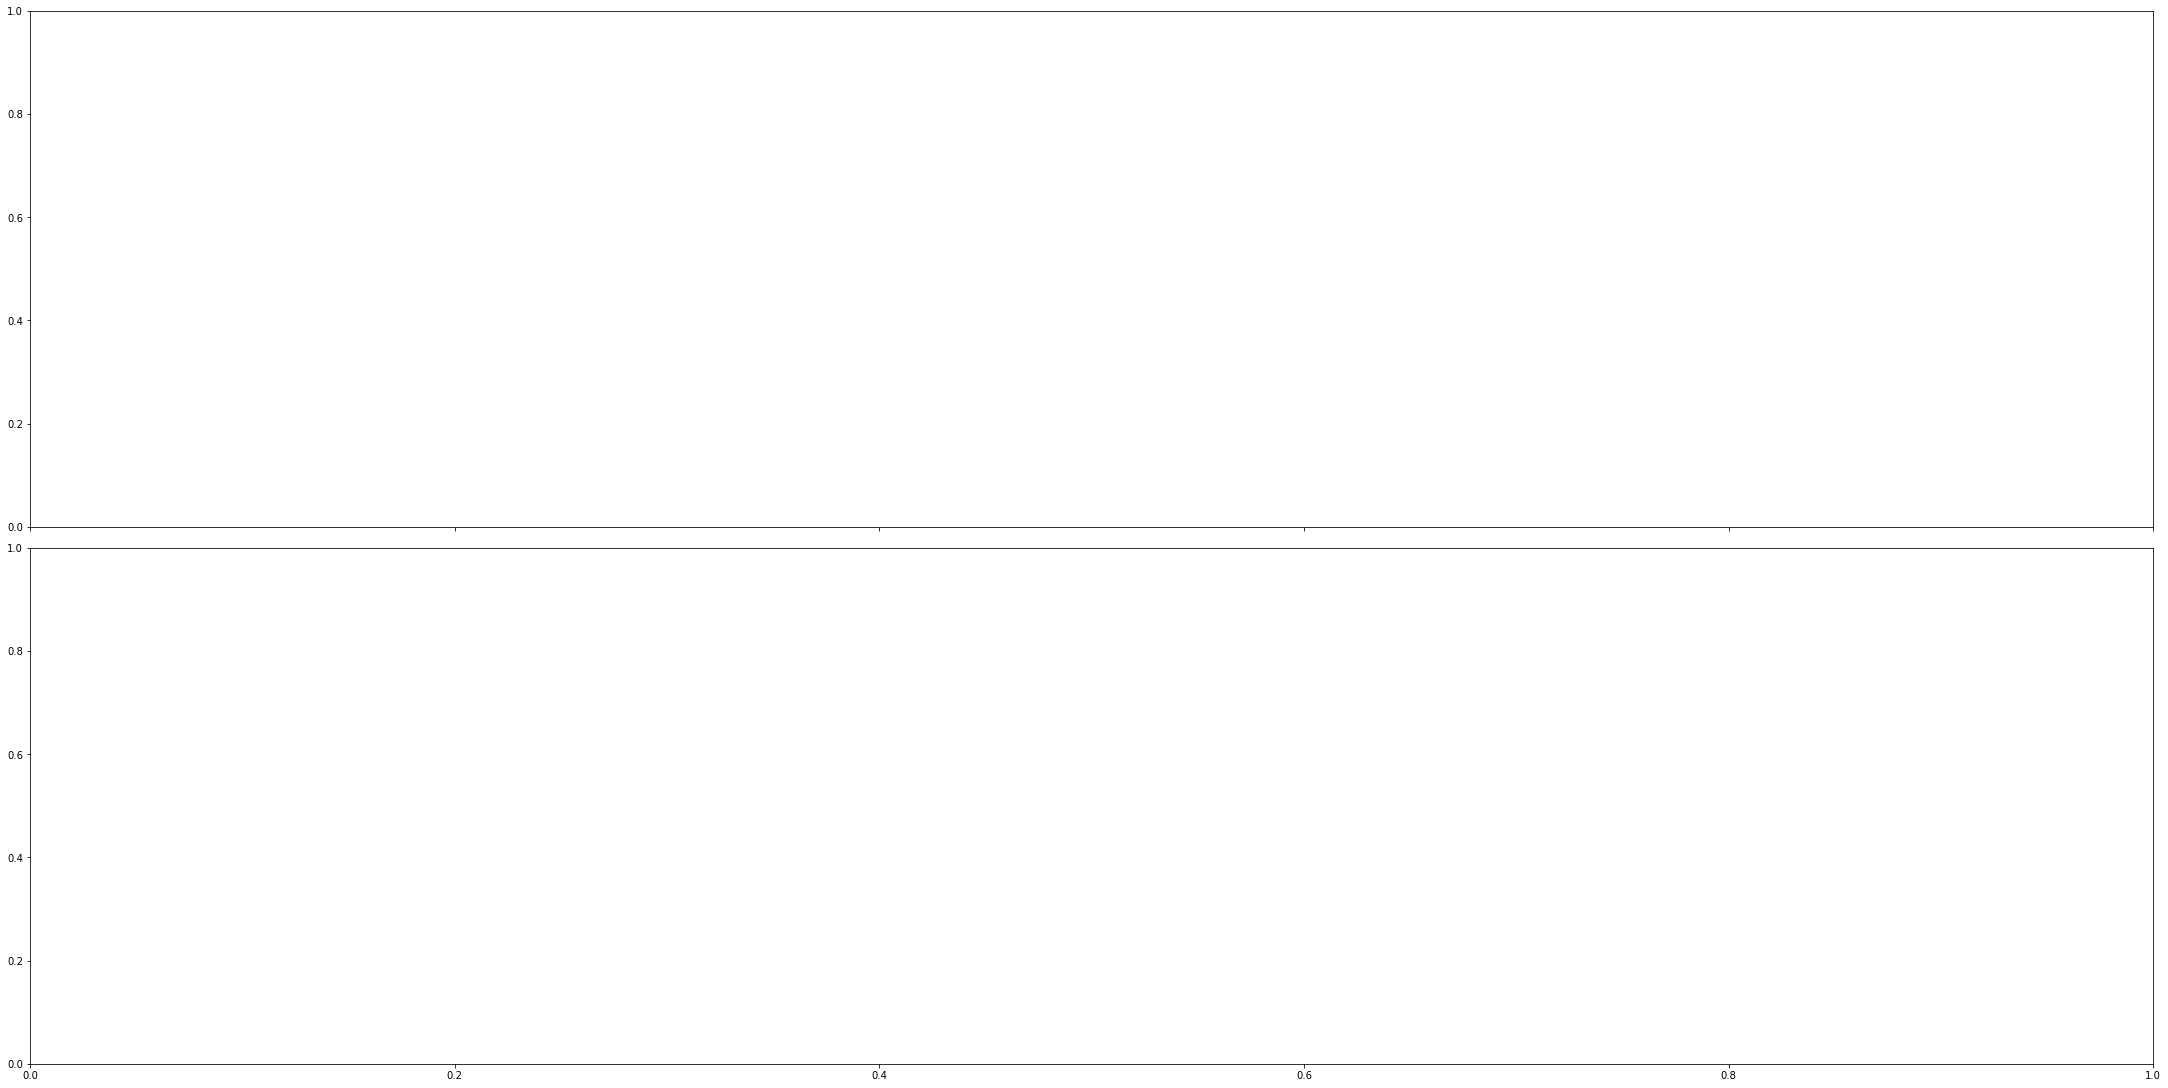

In [36]:
GetPlots(1e2)

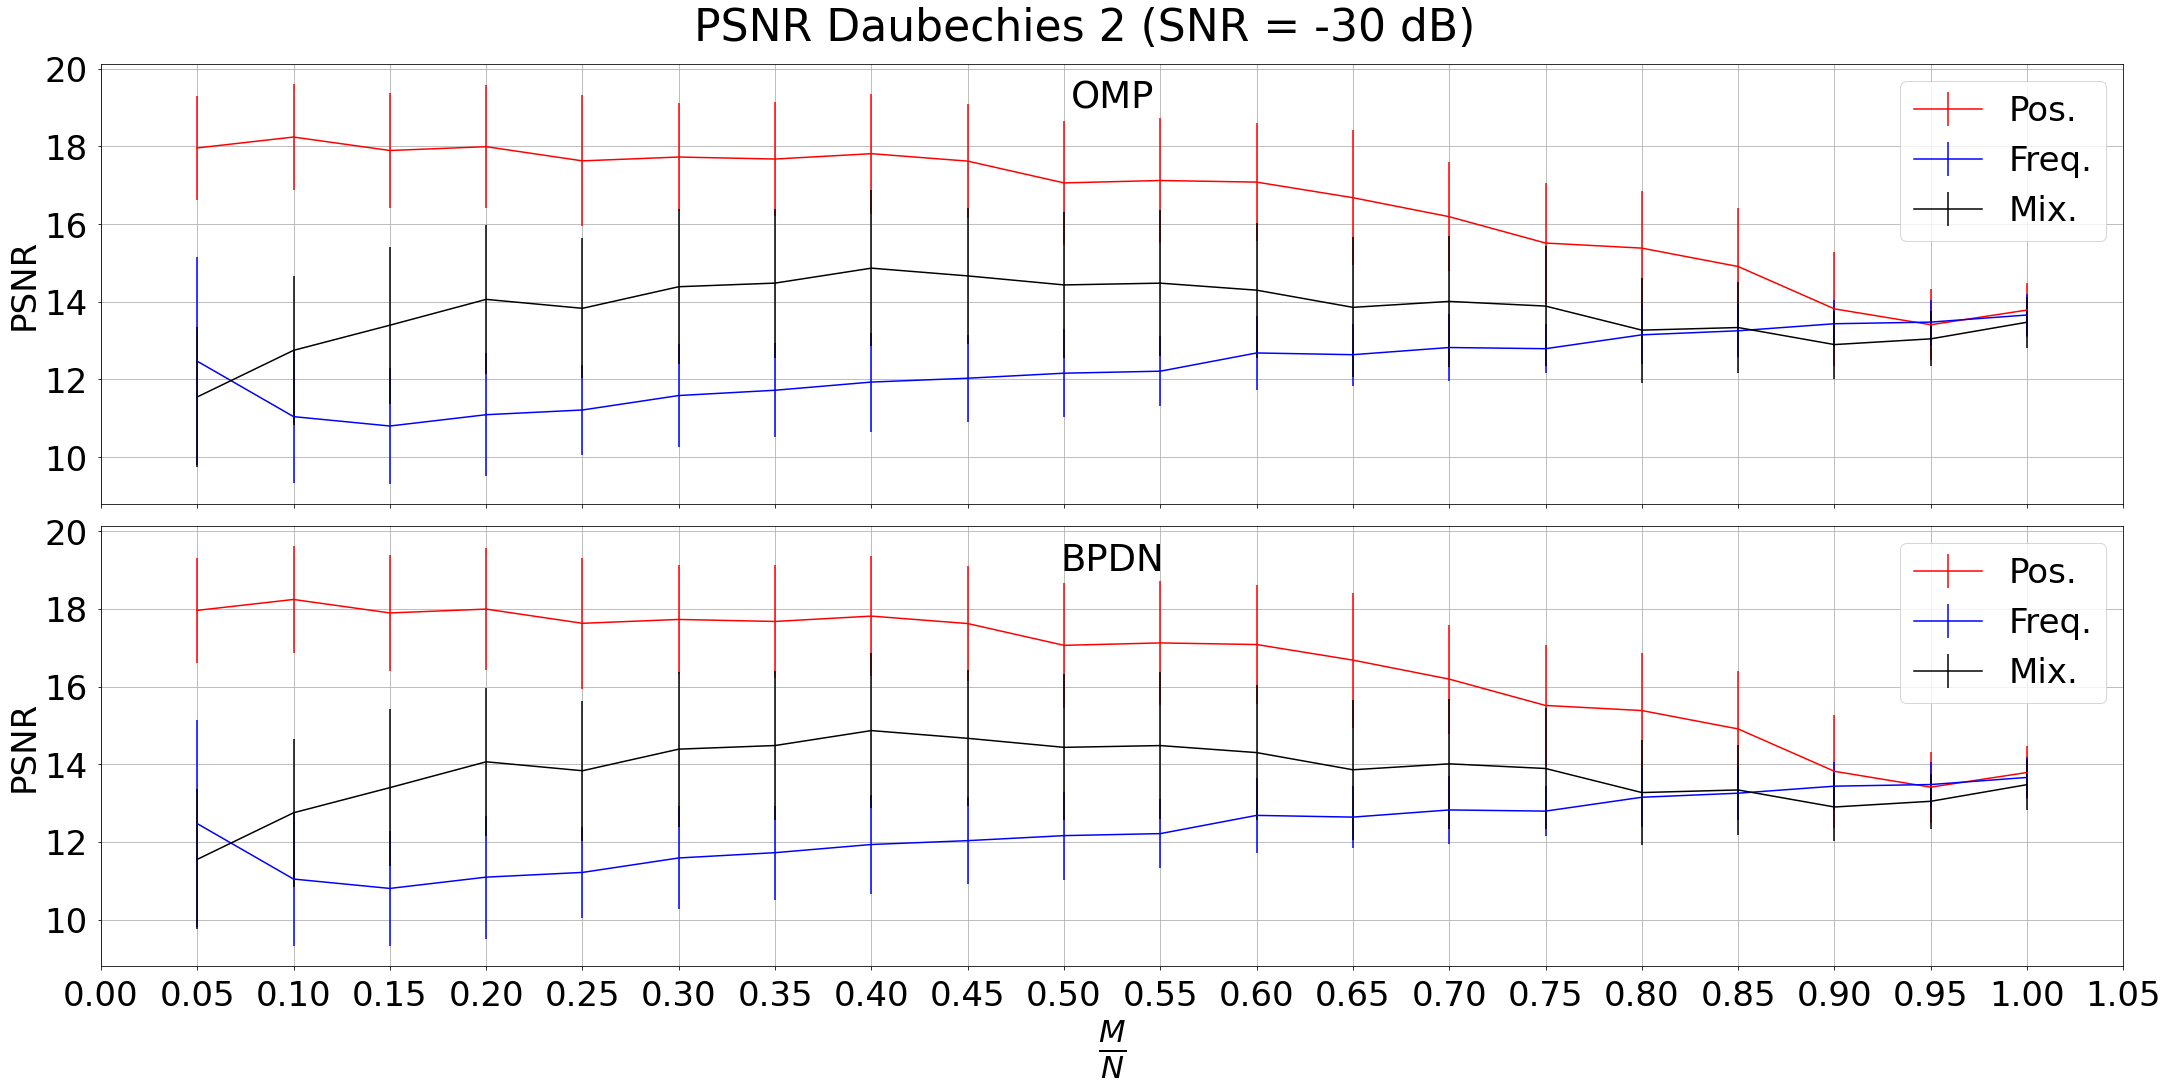

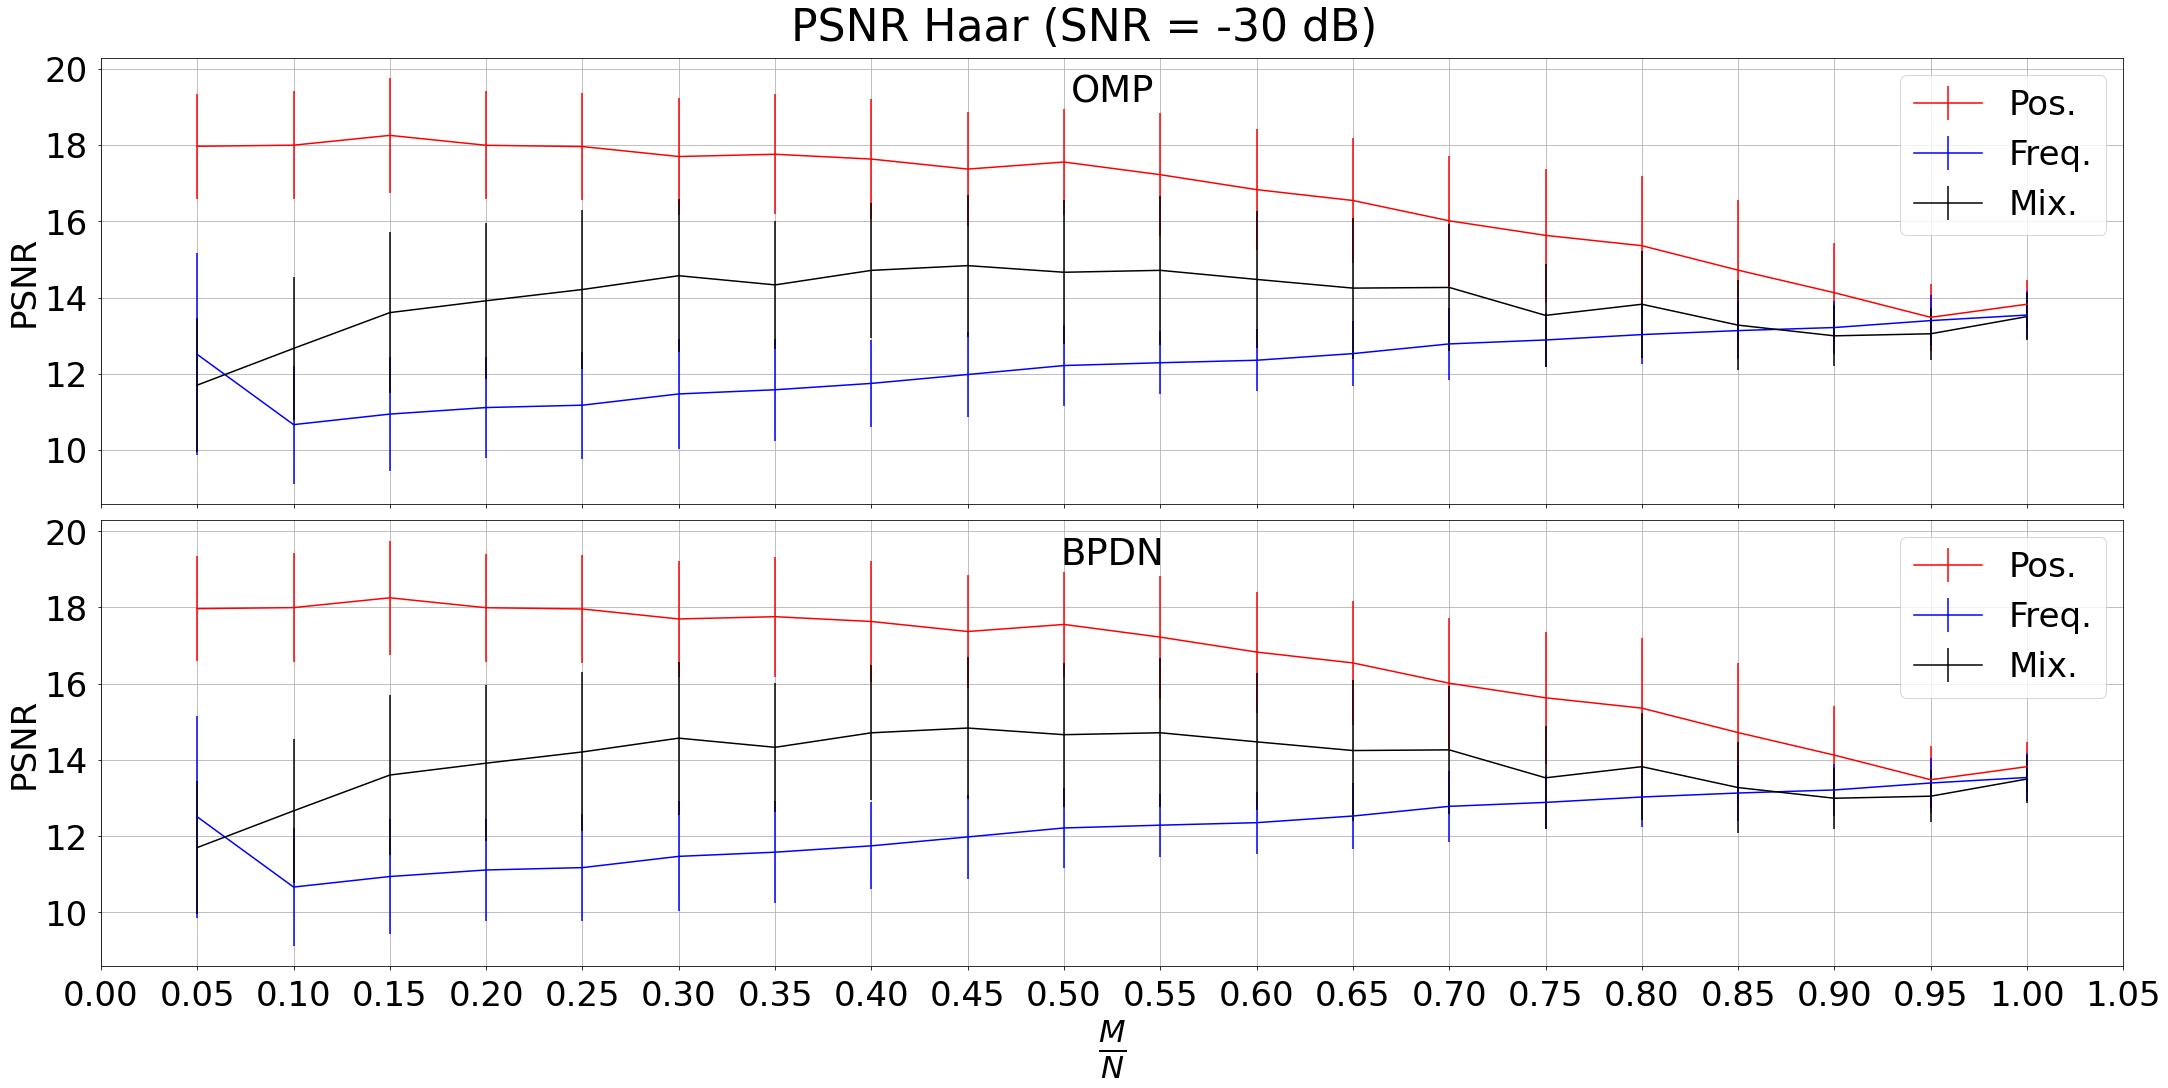

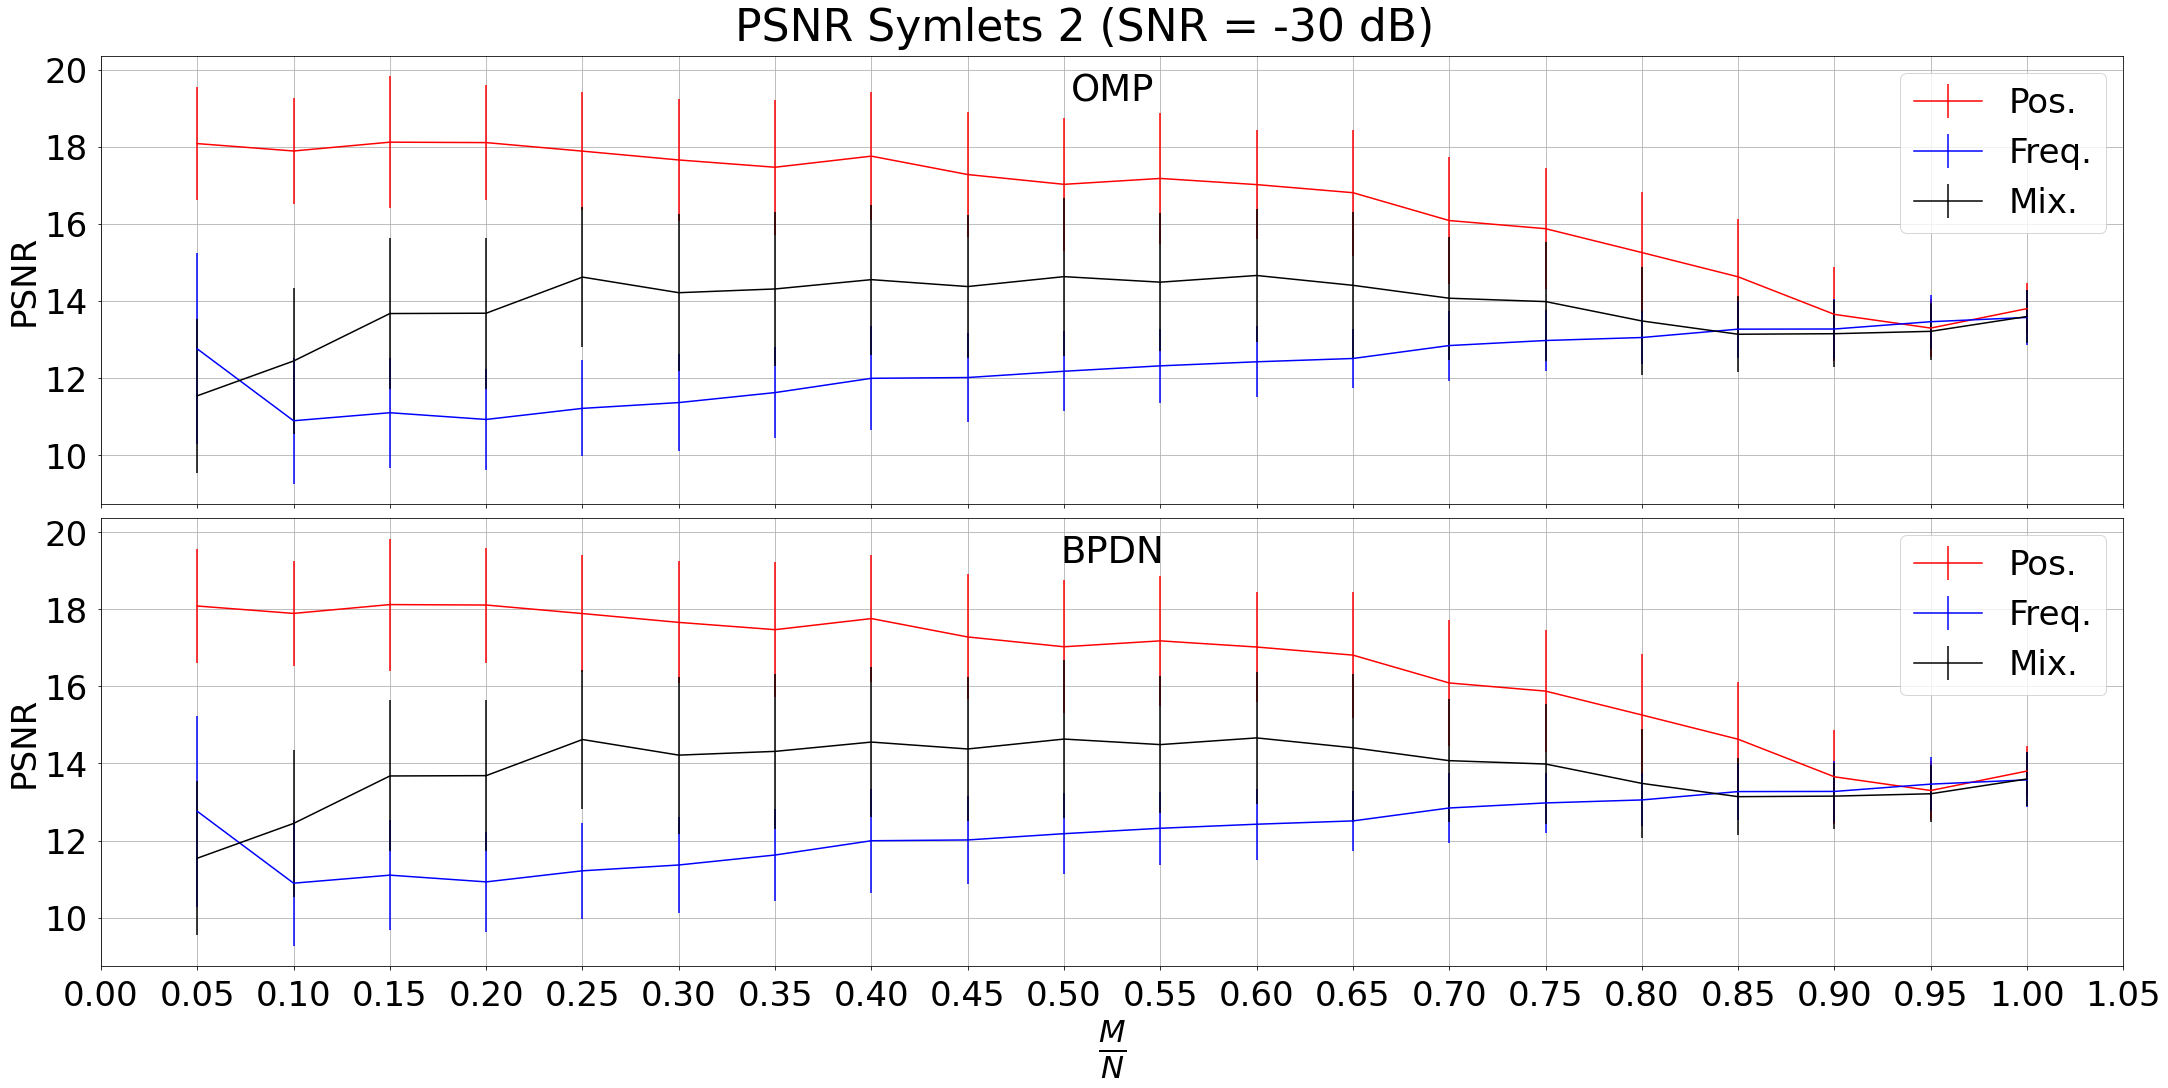

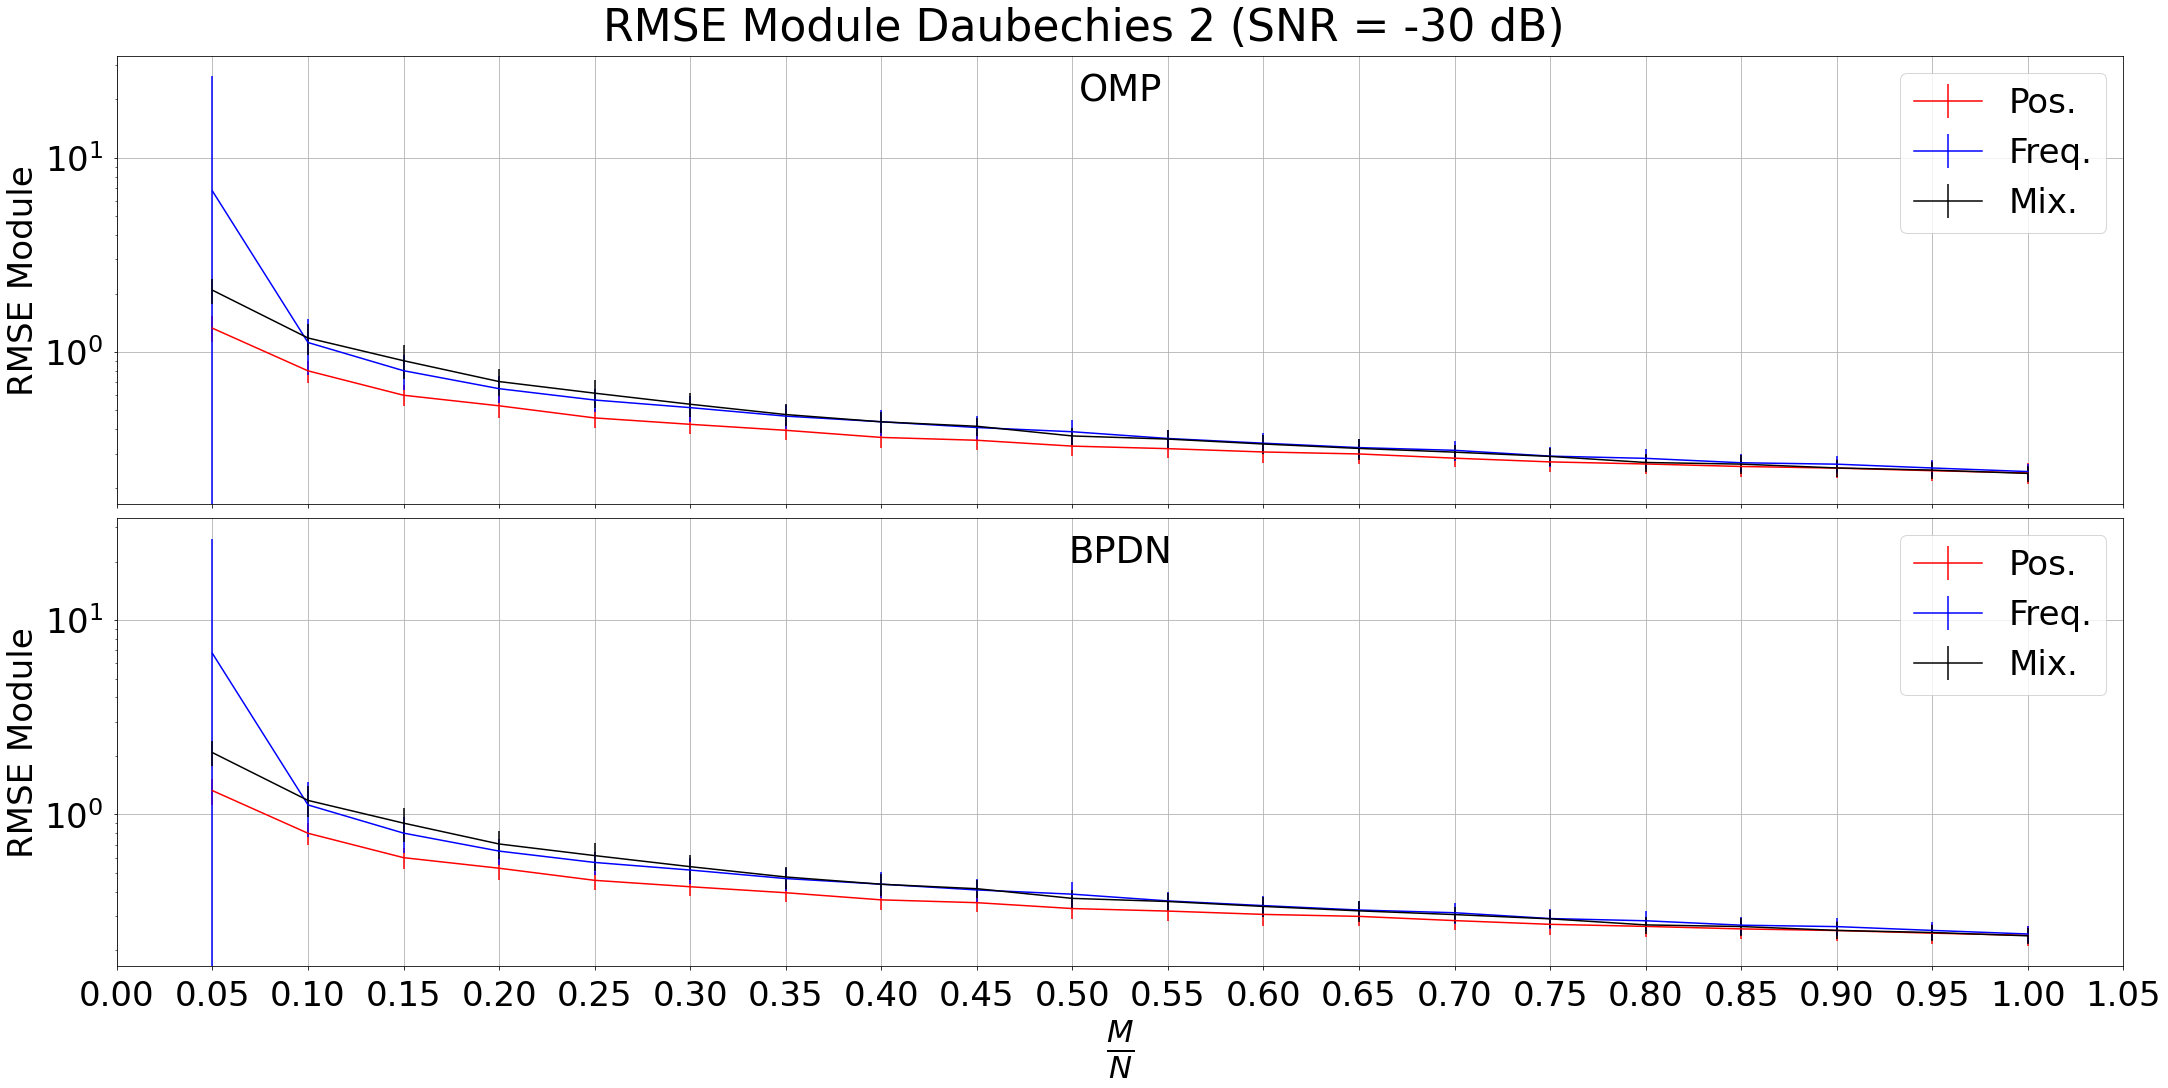

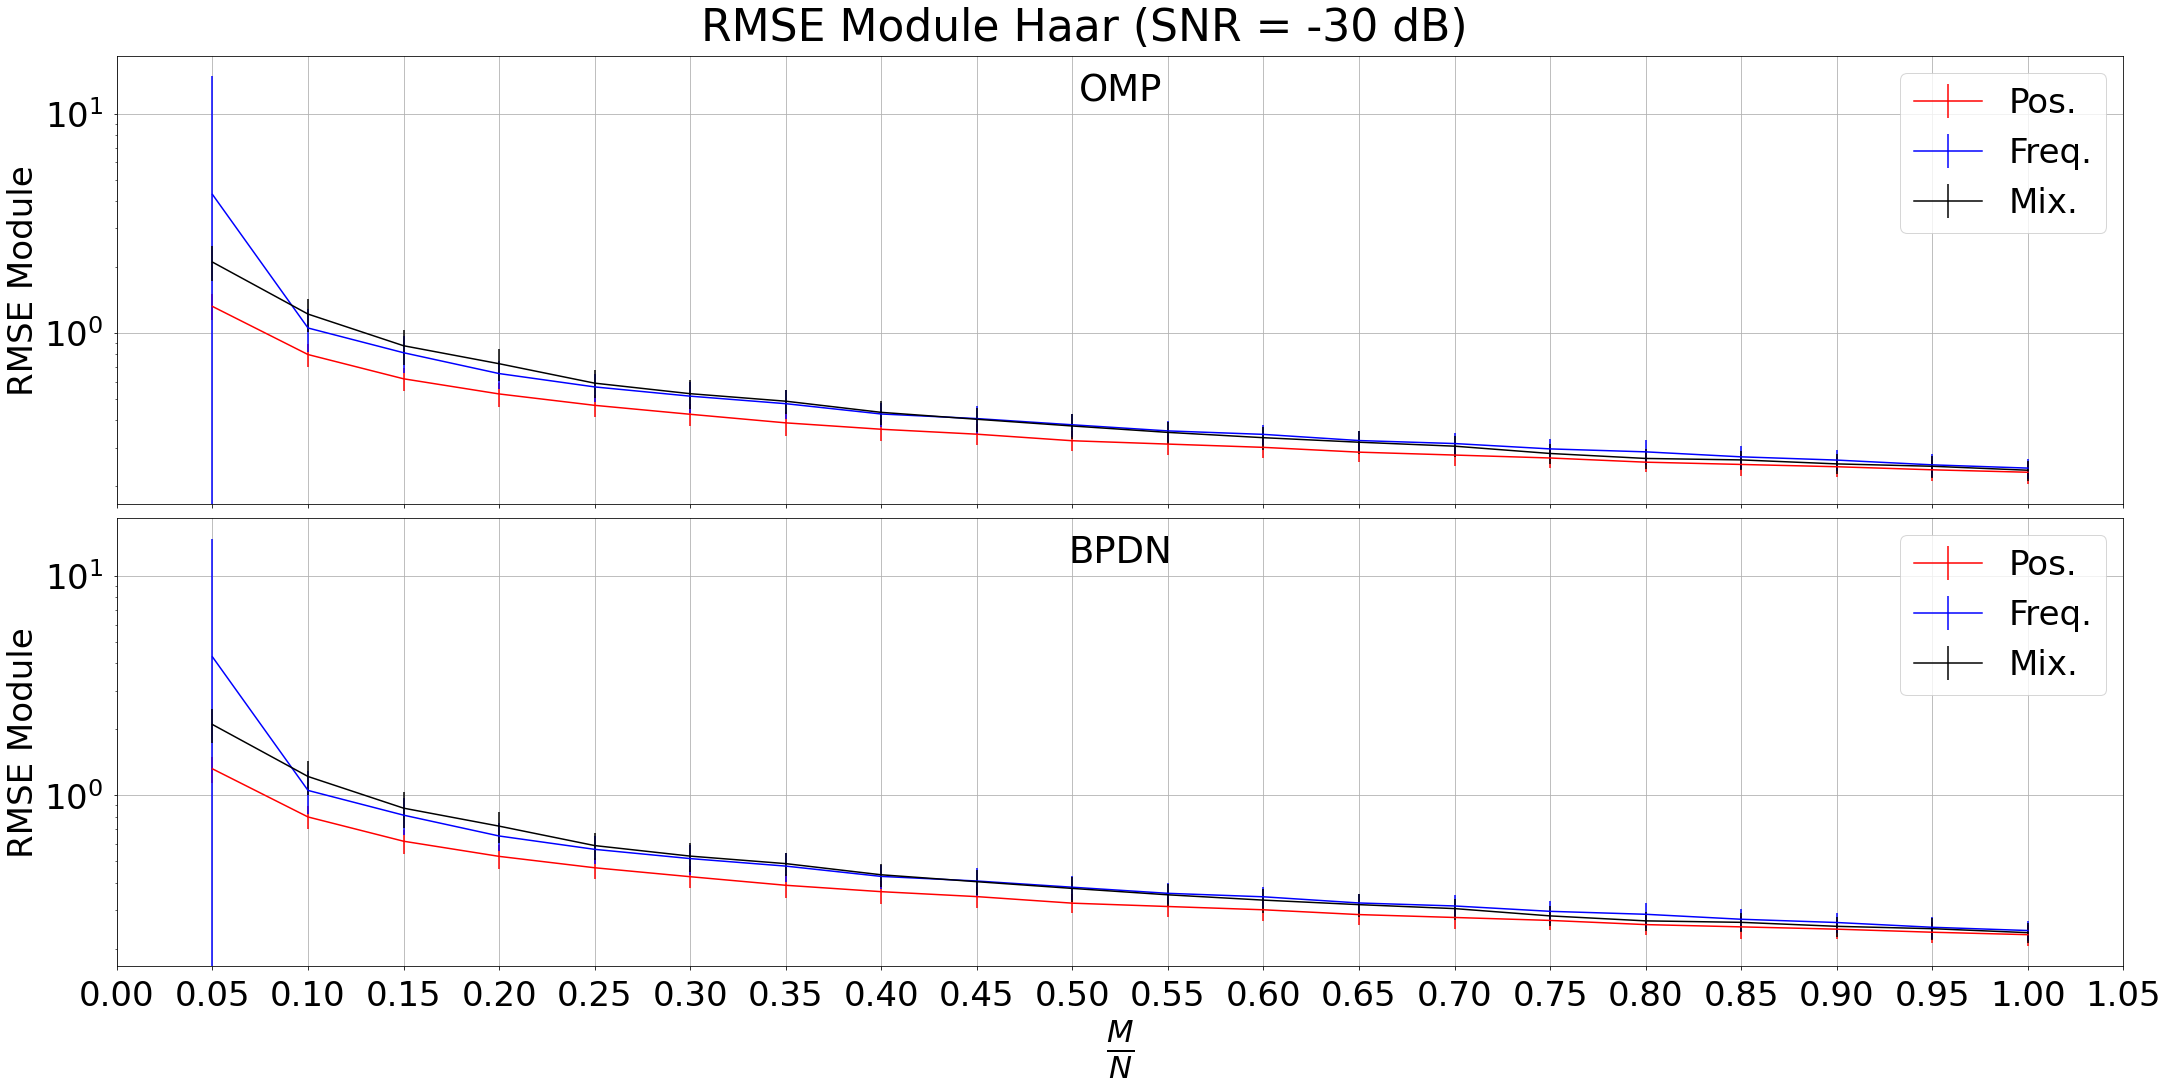

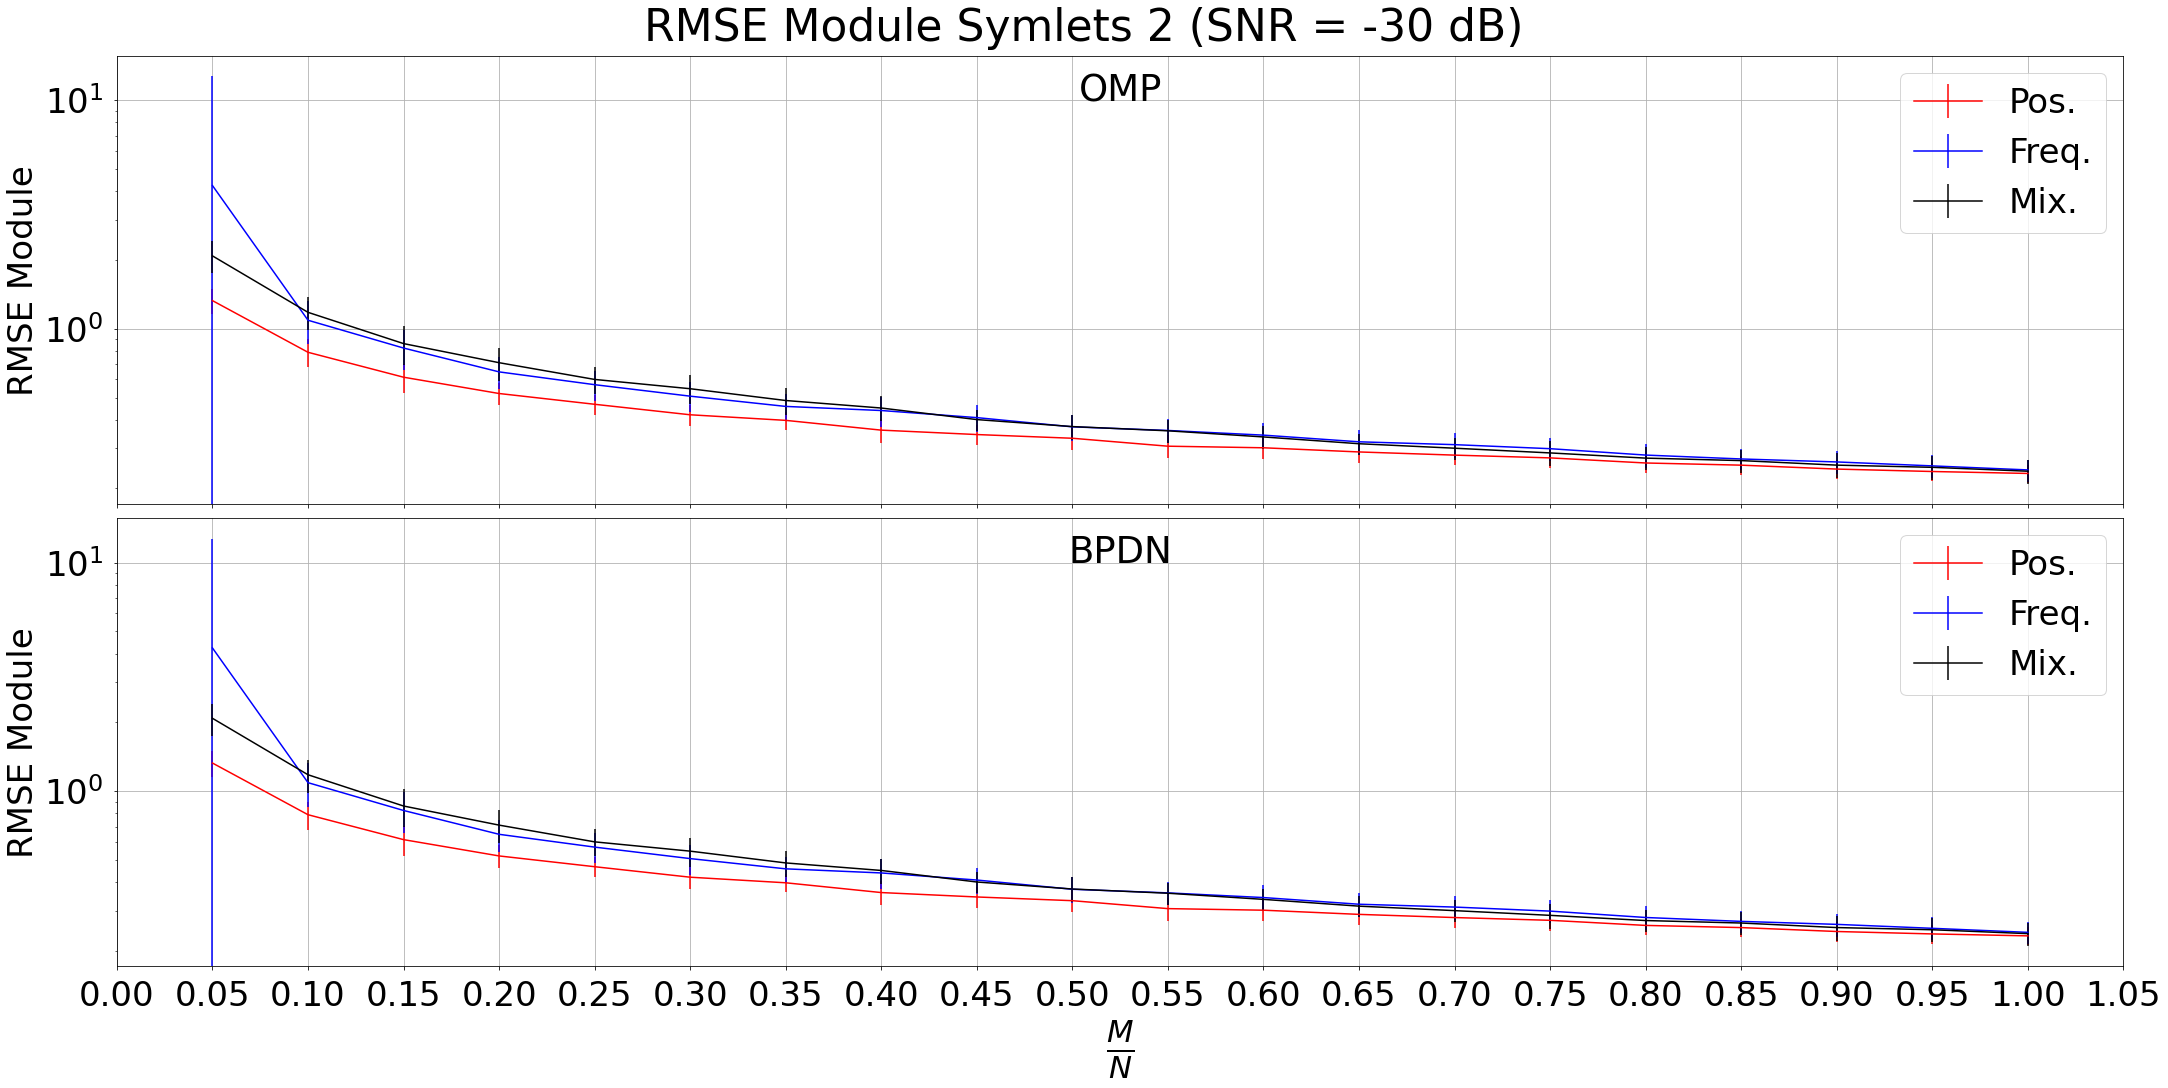

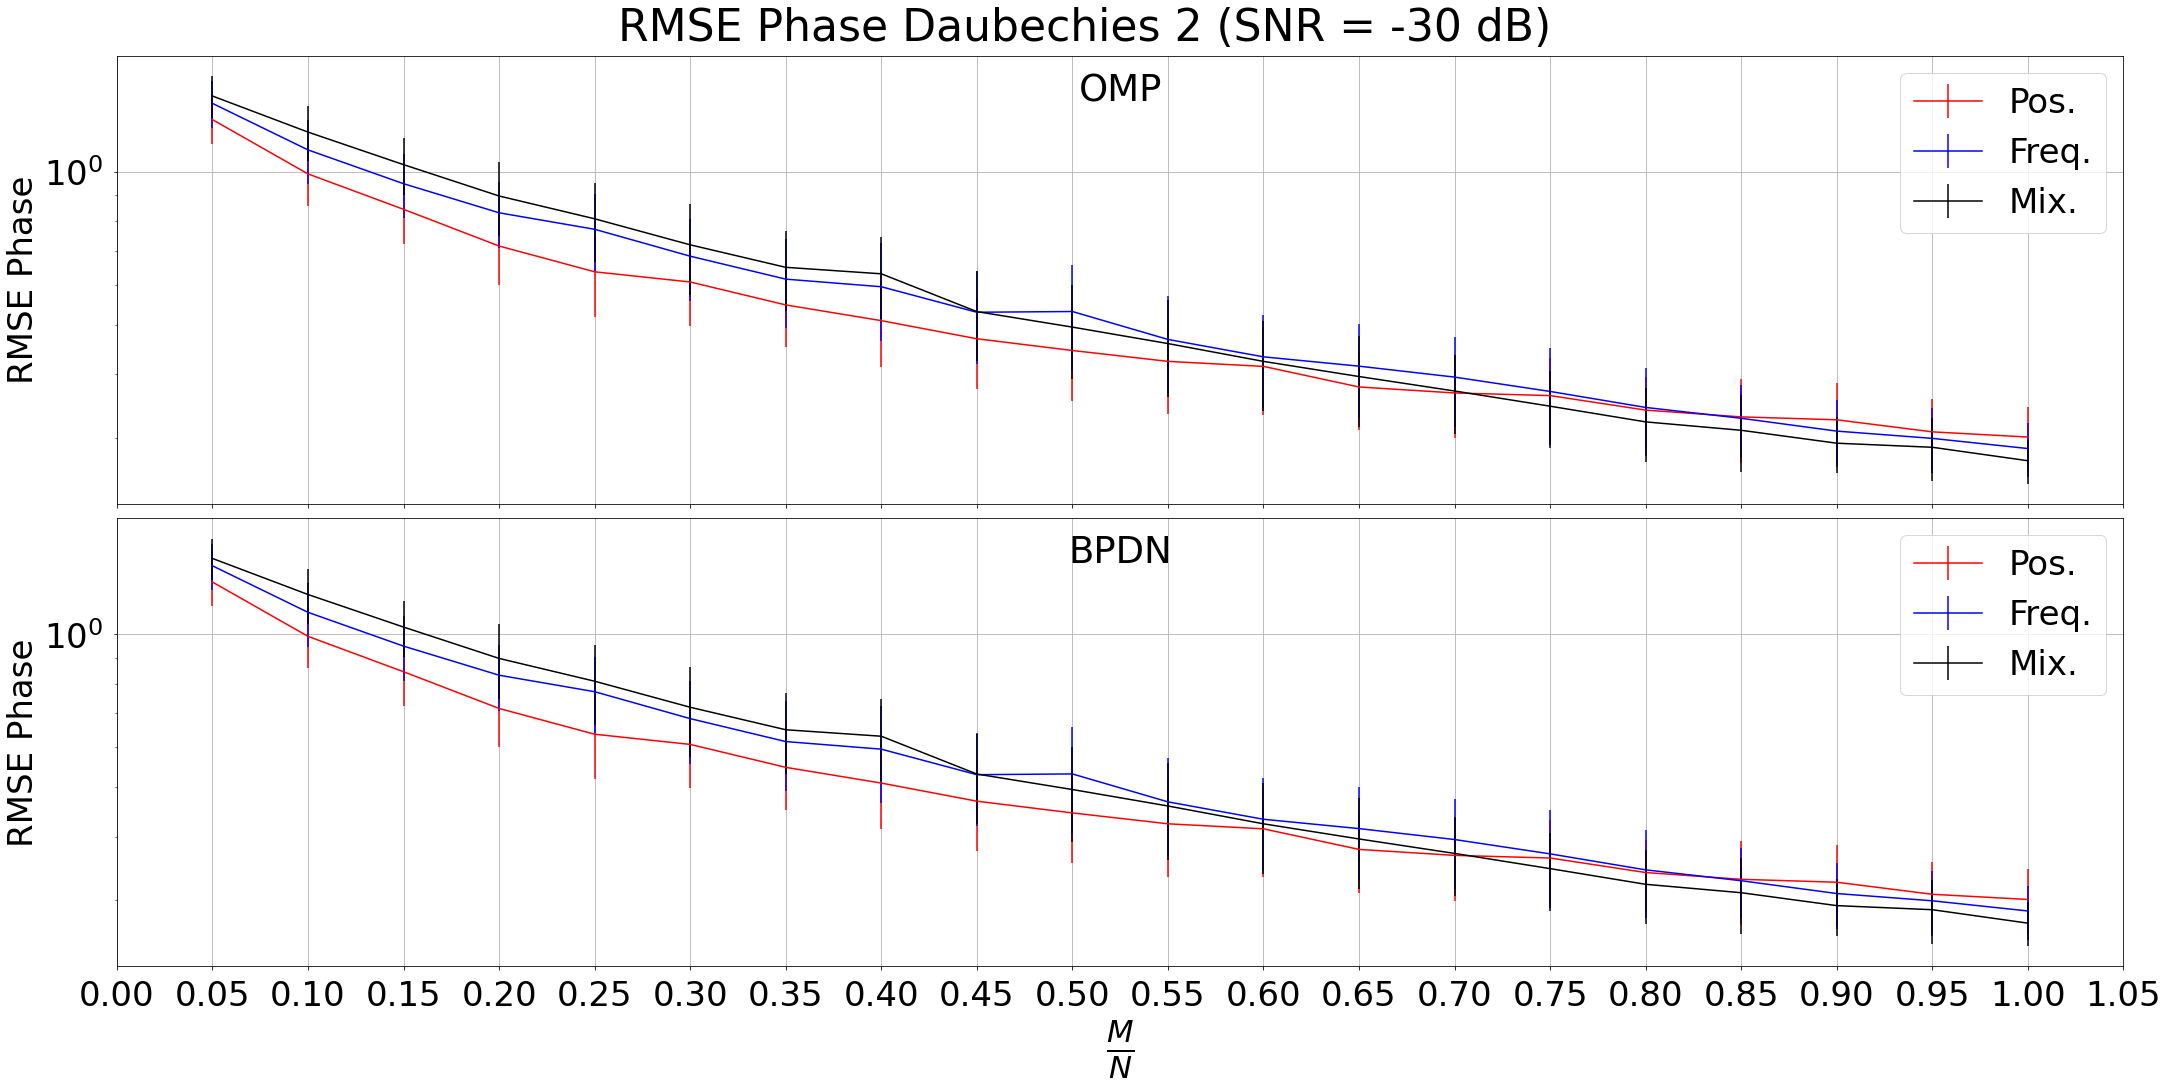

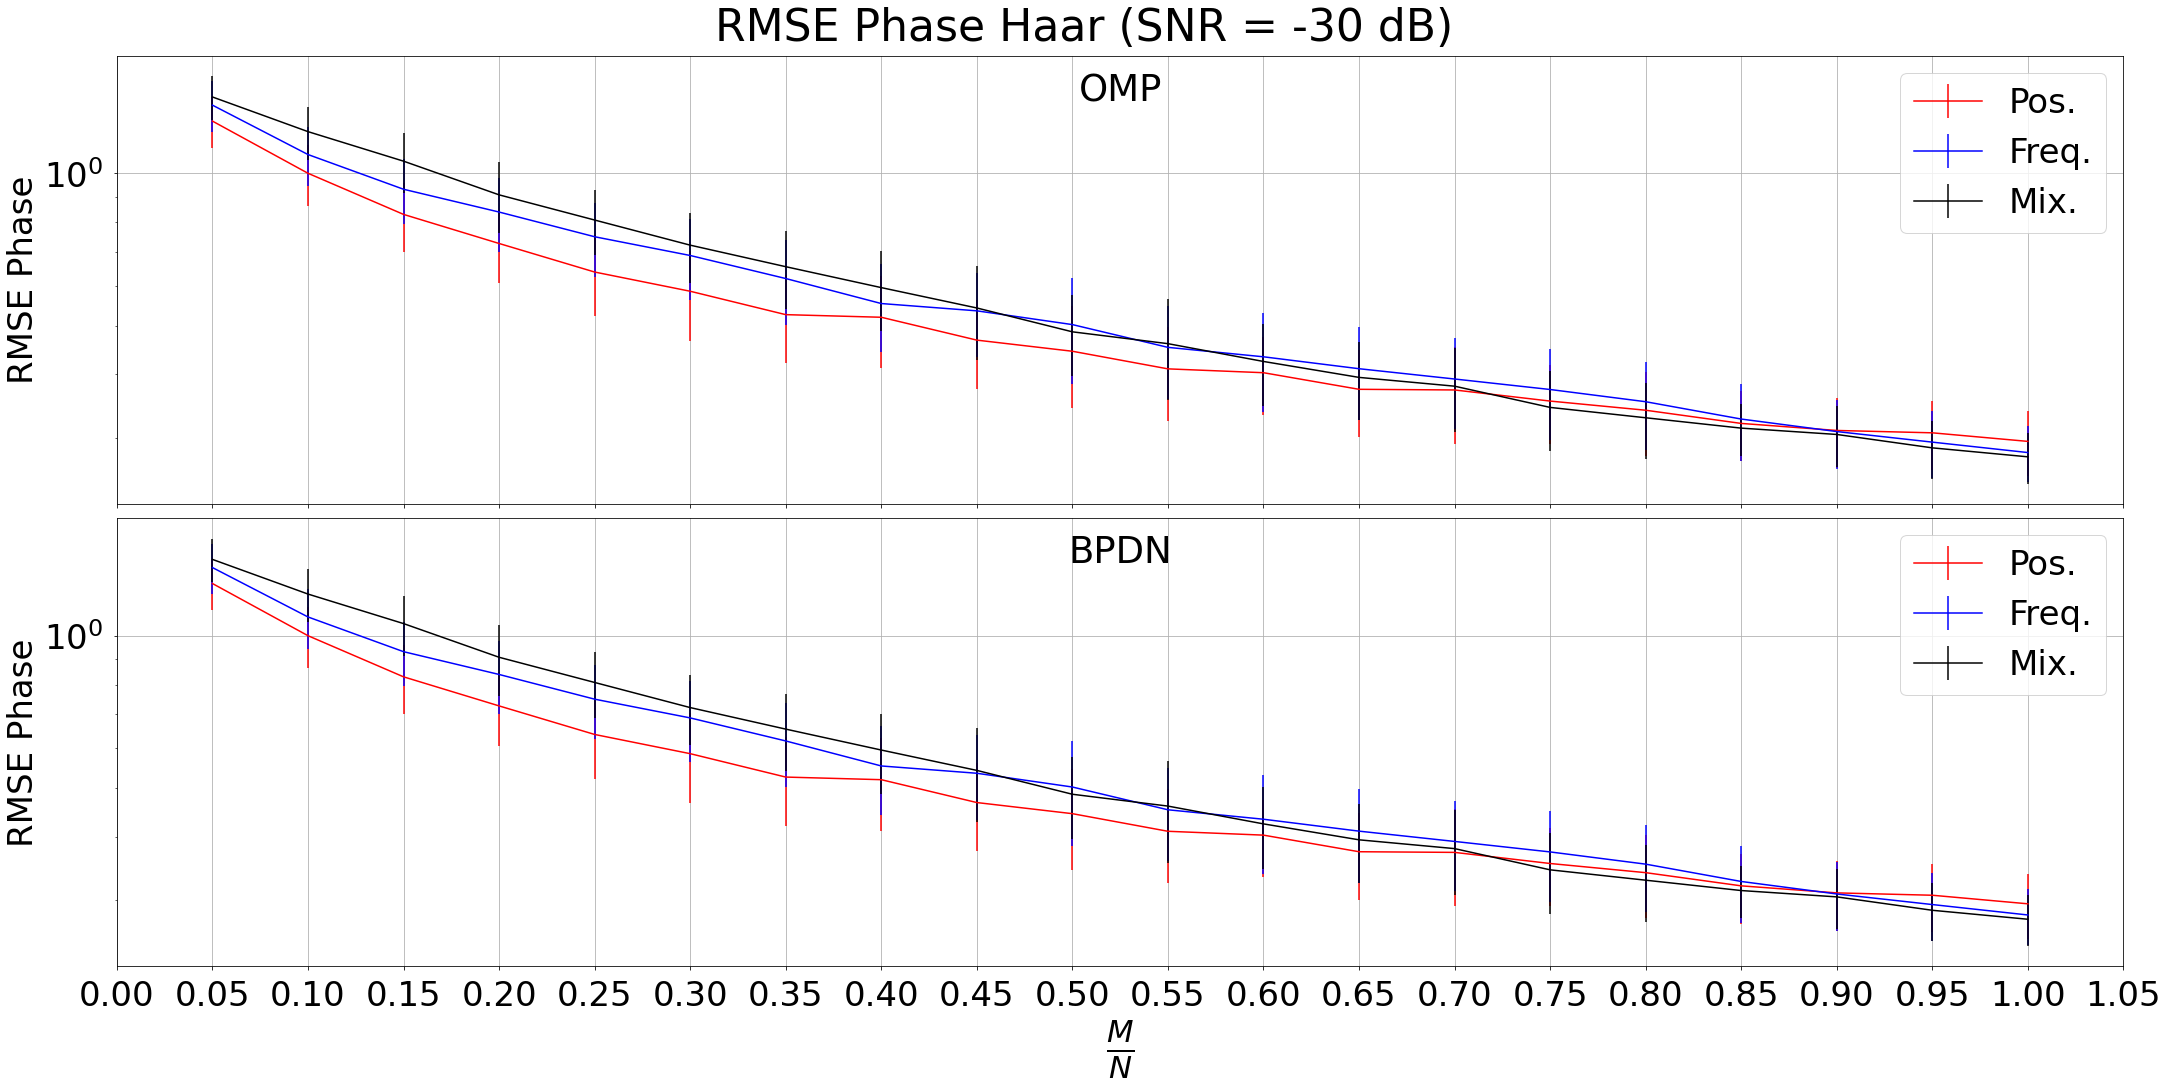

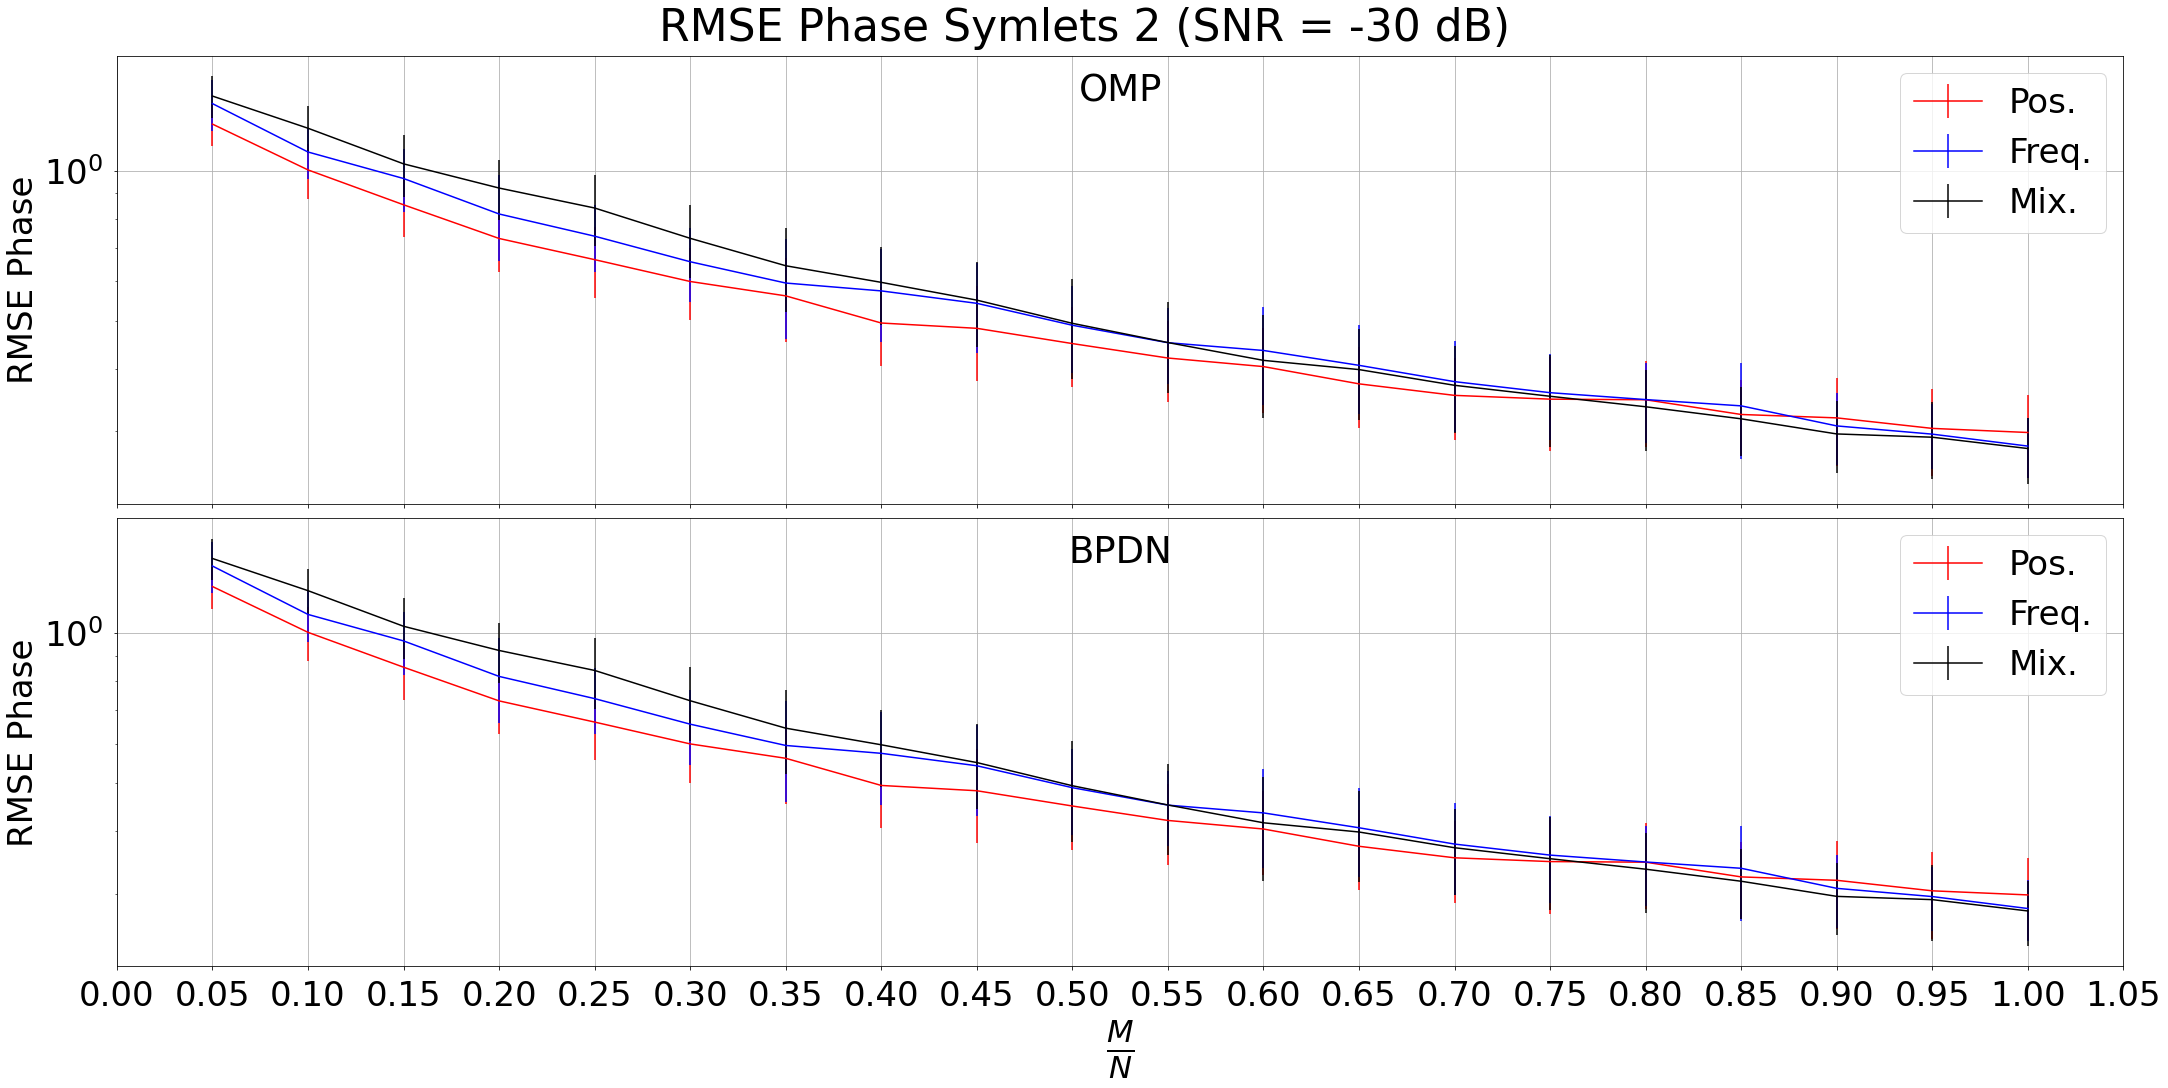

In [37]:
snr = 1e-3
snr_dB = int(10*np.log10(snr))
str_snr = get_str_snr(snr_dB)
#fontsize = 18
yticks = ticker.MaxNLocator(10)
loc = ticker.MultipleLocator(base=0.05)
nticks = 5
maj_loc = ticker.LogLocator(numticks=nticks)
min_loc = ticker.LogLocator(subs='all', numticks=nticks)

fontsize=34
markersize=18
pad = 10
leg_loc = 'upper right'
for var in variable:
    for wv in wavelet:
        fig, ax = plt.subplots(2,1,figsize=(30,15),sharex=True,constrained_layout=True)
        i=0
        for alg in algorithm:
            str_y_pos = '%s_%s_%s_pos_%sdB' % (var,alg,wv,str_snr)
            str_yerr_pos = 'error_%s_%s_%s_pos_%sdB' % (var,alg,wv,str_snr)
            str_y_freq = '%s_%s_%s_freq_%sdB' % (var,alg,wv,str_snr)
            str_yerr_freq = 'error_%s_%s_%s_freq_%sdB' % (var,alg,wv,str_snr)
            str_y_mixed = '%s_%s_%s_mixed_%sdB' % (var,alg,wv,str_snr)
            str_yerr_mixed = 'error_%s_%s_%s_mixed_%sdB' % (var,alg,wv,str_snr)
            y_pos = locals()[str_y_pos]
            yerr_pos = locals()[str_yerr_pos]
            y_freq = locals()[str_y_freq]
            yerr_freq = locals()[str_yerr_freq]
            y_mixed = locals()[str_y_mixed]
            yerr_mixed = locals()[str_yerr_mixed]
            ax[i].errorbar(percentage,y_pos,yerr=yerr_pos,label='Pos.',color='red')
            ax[i].errorbar(percentage,y_freq,yerr=yerr_freq,label='Freq.',color='blue')
            ax[i].errorbar(percentage,y_mixed,yerr=yerr_mixed,label='Mix.',color='black')
            ax[i].legend(fontsize=fontsize)
            #ax[i].set_title('%s-%s-%s' % (var,wv,alg))
            ax[i].text(.5,.9,GetAlgorithmName(alg),horizontalalignment='center',transform=ax[i].transAxes,fontsize=fontsize+3)
            #ax[i].grid()
            ax[i].xaxis.set_tick_params(labelsize=fontsize,pad=pad)
            ax[i].yaxis.set_tick_params(labelsize=fontsize,pad=pad)
            ax[i].xaxis.set_major_locator(loc)
            ax[i].set_xlim(0,1.05)
            if var!='psnr':
                ax[i].set_yscale('log')
                #ax[i].yaxis.set_major_locator(maj_loc)
                #ax[i].yaxis.set_minor_locator(min_loc)
                #ax[i].yaxis.get_major_locator().numticks = 4
                #ax[i].set_ylim(1e-5,1e2)
                y_major = ticker.LogLocator(base = 10.0, numticks = 5)
                ax[i].yaxis.set_major_locator(y_major)
                y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 5)
                ax[i].yaxis.set_minor_locator(y_minor)
                ax[i].yaxis.set_minor_formatter(ticker.NullFormatter())
                #ax[i].yaxis.set_minor_formatter(plt.FormatStrFormatter("%.0E"))
            ax[i].set_ylabel('%s' % GetTitleAndLabels(var),fontsize=fontsize)
            if i>0:
                ax[i].set_xlabel(r'$\frac{M}{N}$',fontsize=fontsize+10)
            ax[i].grid()
            fig.suptitle('%s %s (SNR = %d dB)' % (GetTitleAndLabels(var),GetWaveletName(wv),snr_dB),fontsize=fontsize+10)
            plot_title = 'Reconstrucciones/reco-efficiency-%s-%s-SNR=%sdB.png' % (var,wv,snr_dB)
            #print(plot_title)
            plt.savefig(plot_title,bbox_inches='tight')
            i+=1

In [ ]:
#error_psnr_omp_db2_pos_minus30dB

In [9]:
for var in variable:
    for alg in algorithm:
        for wv in wavelet:
            for u in us:
                #filename = locals()['%s-%s-%s-%s' % (var,alg,wv,u)]
                print('%s_%s_%s_%s_%sdB' % (var,alg,wv,u,str_snr))
                filename = locals()['%s_%s_%s_%s_%sdB' % (var,alg,wv,u,str_snr)]
                filename_err = locals()['error_%s_%s_%s_%s_%sdB' % (var,alg,wv,u,str_snr)]
                #plt.errorbar(percentage,filename,yerr=filename)
                #print(filename)
            #print('%s-%s-%s' % (var,alg,wv))

psnr_omp_db2_pos_plus10dB
psnr_omp_db2_freq_plus10dB
psnr_omp_db2_mixed_plus10dB
psnr_omp_haar_pos_plus10dB
psnr_omp_haar_freq_plus10dB
psnr_omp_haar_mixed_plus10dB
psnr_omp_sym2_pos_plus10dB
psnr_omp_sym2_freq_plus10dB
psnr_omp_sym2_mixed_plus10dB
psnr_spgl1_db2_pos_plus10dB
psnr_spgl1_db2_freq_plus10dB
psnr_spgl1_db2_mixed_plus10dB
psnr_spgl1_haar_pos_plus10dB
psnr_spgl1_haar_freq_plus10dB
psnr_spgl1_haar_mixed_plus10dB
psnr_spgl1_sym2_pos_plus10dB
psnr_spgl1_sym2_freq_plus10dB
psnr_spgl1_sym2_mixed_plus10dB
rmse_module_omp_db2_pos_plus10dB
rmse_module_omp_db2_freq_plus10dB
rmse_module_omp_db2_mixed_plus10dB
rmse_module_omp_haar_pos_plus10dB
rmse_module_omp_haar_freq_plus10dB
rmse_module_omp_haar_mixed_plus10dB
rmse_module_omp_sym2_pos_plus10dB
rmse_module_omp_sym2_freq_plus10dB
rmse_module_omp_sym2_mixed_plus10dB
rmse_module_spgl1_db2_pos_plus10dB
rmse_module_spgl1_db2_freq_plus10dB
rmse_module_spgl1_db2_mixed_plus10dB
rmse_module_spgl1_haar_pos_plus10dB
rmse_module_spgl1_haar_freq_

In [8]:
#psnr_omp_db2_pos_plus40dB

### Plotting PSNR and RMSE (module & phase) vs $\frac{M}{N}$ for different SNR values

In [ ]:
#np.isclose(psnr_omp_db2_pos_plus40dB,psnr_spgl1_db2_pos_plus40dB)
print(np.isclose(rmse_omp_module_db2_pos_plus30dB,rmse_spgl1_module_db2_pos_plus30dB))
print(np.isclose(rmse_omp_phase_db2_pos_plus30dB,rmse_spgl1_phase_db2_pos_plus30dB))

In [10]:
snr = 1e-3
snr_dB = 10*np.log10(snr)
str_snr = get_str_snr(snr_dB)
MakePlot(variable[0],algorithm[0],wavelet[0],str_snr)

NameError: name 'MakePlot' is not defined

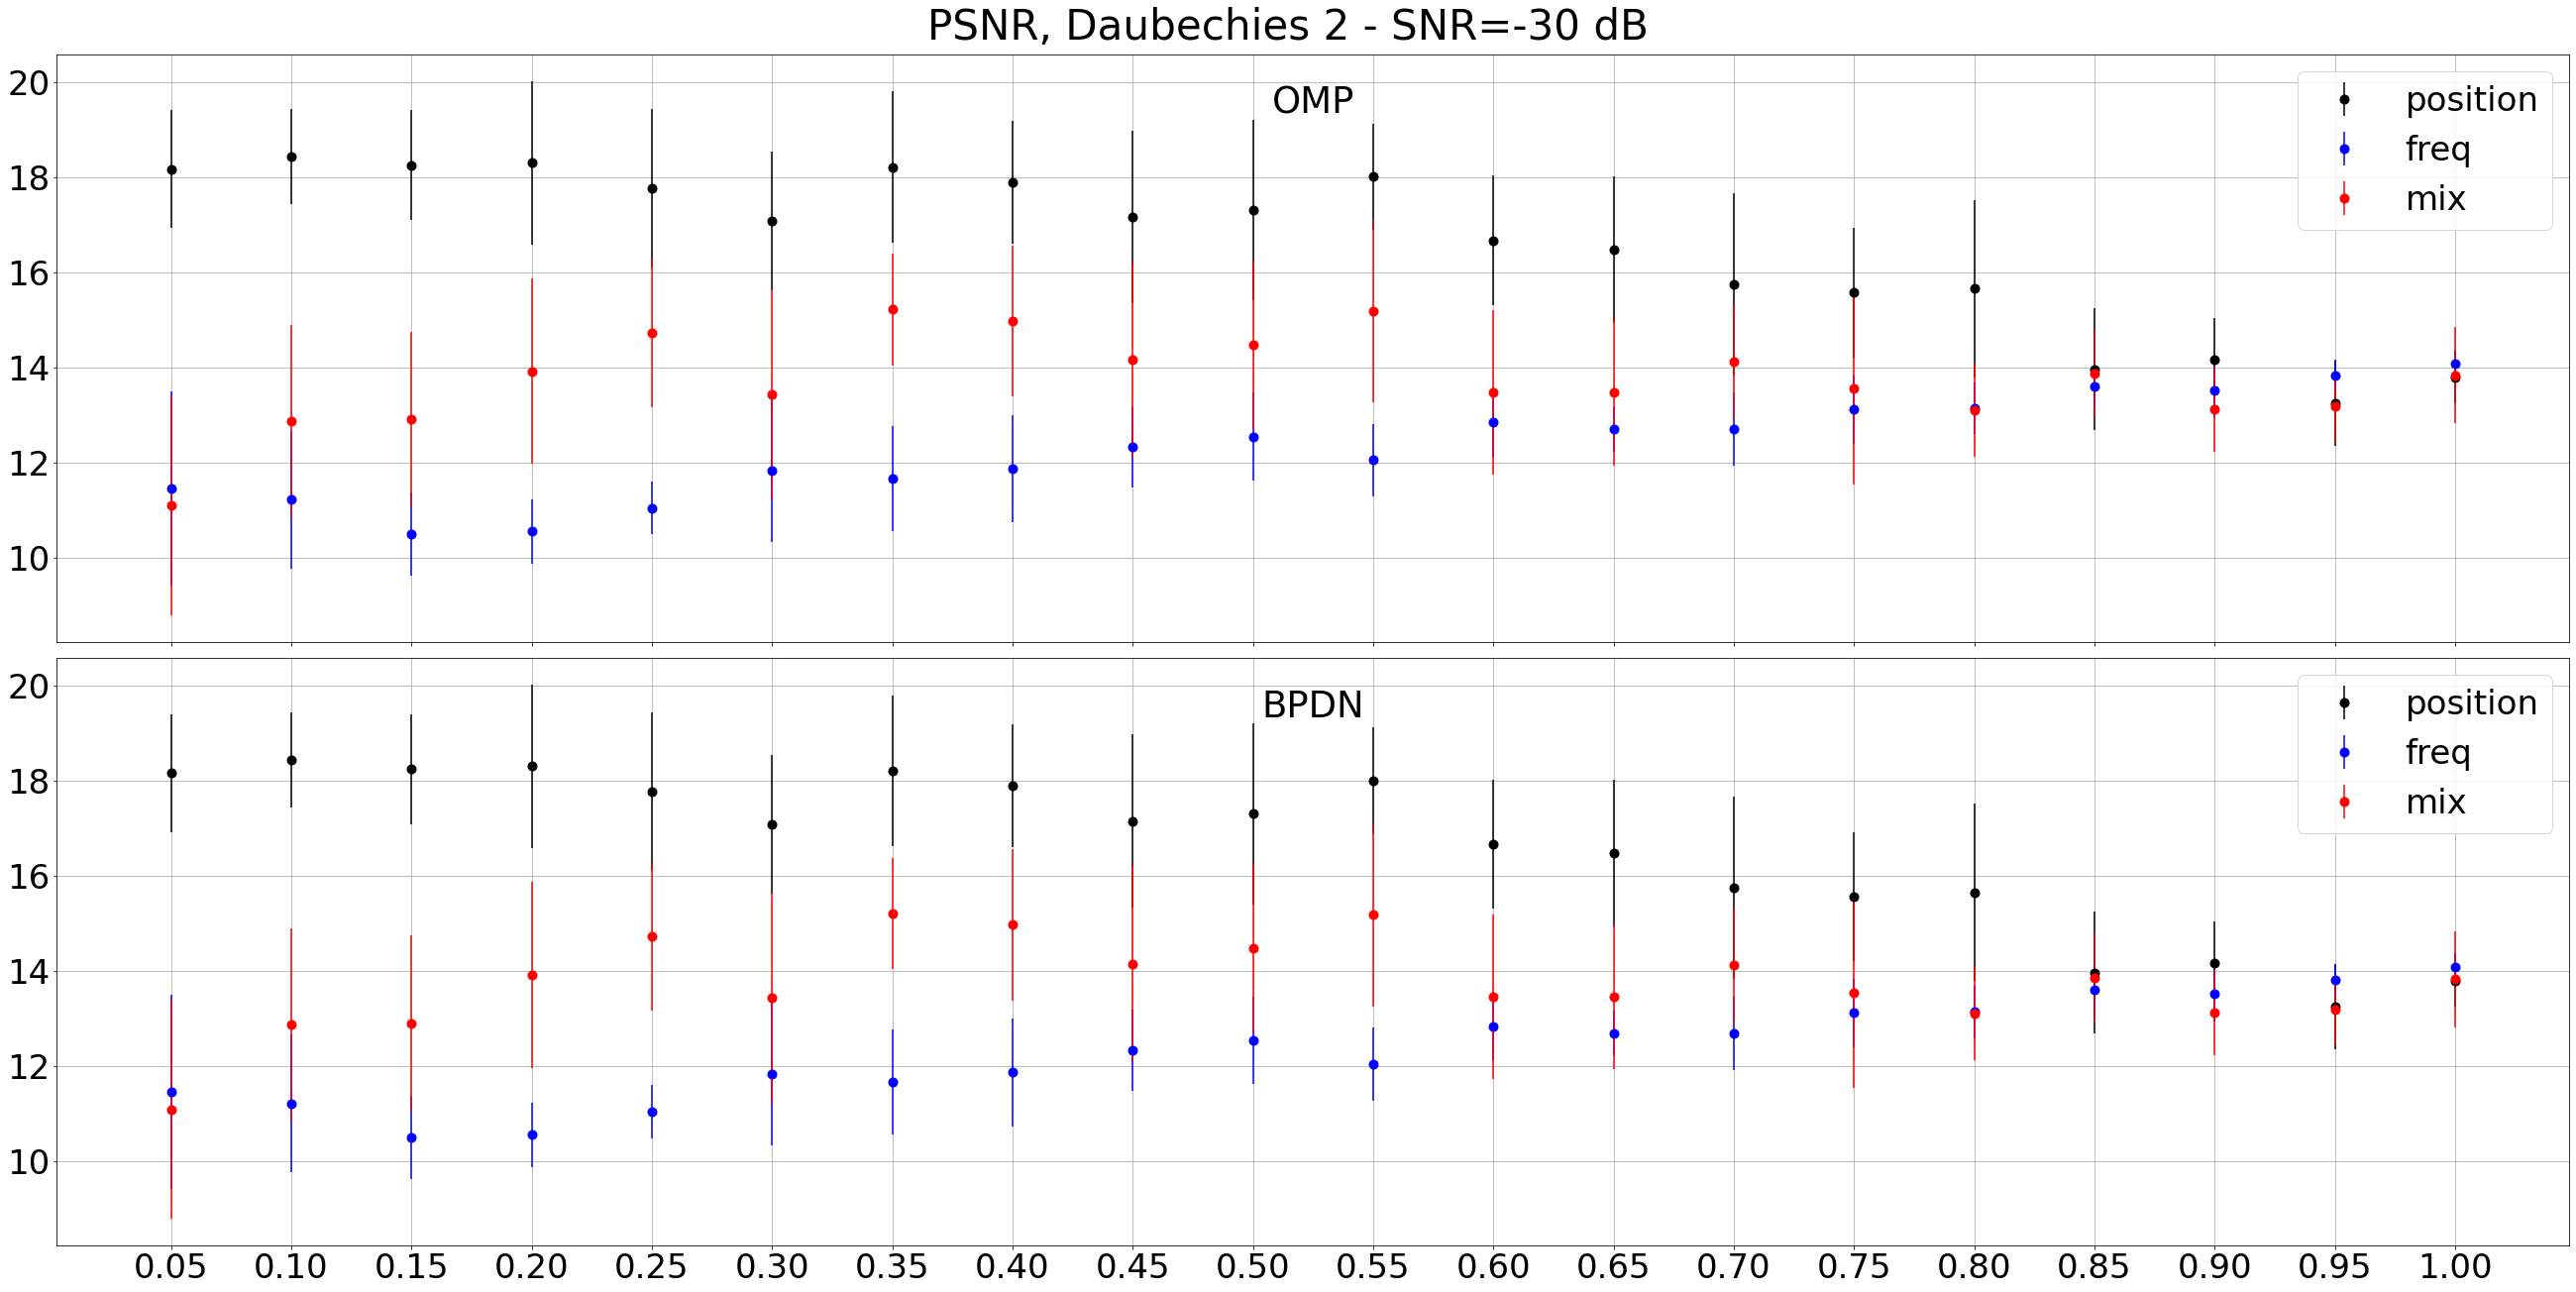

In [58]:
colors = ['black','blue','red']
yticks = ticker.MaxNLocator(10)
loc = ticker.MultipleLocator(base=0.05)
fontsize=34
markersize=18
leg_loc = 'upper right'
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus30dB,yerr=error_psnr_omp_db2_pos_minus30dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus30dB,yerr=error_psnr_omp_db2_freq_minus30dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus30dB,yerr=error_psnr_omp_db2_mixed_minus30dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus30dB,yerr=error_psnr_spgl1_db2_pos_minus30dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus30dB,yerr=error_psnr_spgl1_db2_freq_minus30dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus30dB,yerr=error_psnr_spgl1_db2_mixed_minus30dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=-30 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=-30dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=-30dB.pdf',bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus20dB,yerr=error_psnr_omp_db2_mixed_minus20dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus20dB,yerr=error_psnr_spgl1_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus20dB,yerr=error_psnr_spgl1_db2_freq_minus20dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus20dB,yerr=error_psnr_spgl1_db2_mixed_minus20dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=-20 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=-20dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=-20dB.pdf',bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus10dB,yerr=error_psnr_omp_db2_mixed_minus10dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus10dB,yerr=error_psnr_spgl1_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus10dB,yerr=error_psnr_spgl1_db2_freq_minus10dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus10dB,yerr=error_psnr_spgl1_db2_mixed_minus10dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=-10 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=-10dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=-10dB.pdf',bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_0dB,yerr=error_psnr_omp_db2_pos_0dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_0dB,yerr=error_psnr_omp_db2_freq_0dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_0dB,yerr=error_psnr_omp_db2_mixed_0dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_0dB,yerr=error_psnr_spgl1_db2_pos_0dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_0dB,yerr=error_psnr_spgl1_db2_freq_0dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_0dB,yerr=error_psnr_spgl1_db2_mixed_0dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=0 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=0dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=0dB.pdf',bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus10dB,yerr=error_psnr_omp_db2_pos_plus10dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus10dB,yerr=error_psnr_omp_db2_freq_plus10dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus10dB,yerr=error_psnr_omp_db2_mixed_plus10dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus10dB,yerr=error_psnr_spgl1_db2_pos_plus10dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus10dB,yerr=error_psnr_spgl1_db2_freq_plus10dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus10dB,yerr=error_psnr_spgl1_db2_mixed_plus10dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=10 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=10dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=10dB.pdf',bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus20dB,yerr=error_psnr_omp_db2_pos_plus20dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus20dB,yerr=error_psnr_omp_db2_freq_plus20dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus20dB,yerr=error_psnr_omp_db2_mixed_plus20dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus20dB,yerr=error_psnr_spgl1_db2_pos_plus20dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus20dB,yerr=error_psnr_spgl1_db2_freq_plus20dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus20dB,yerr=error_psnr_spgl1_db2_mixed_plus20dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=20 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=20dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=20dB.pdf',bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus30dB,yerr=error_psnr_omp_db2_pos_plus30dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus30dB,yerr=error_psnr_omp_db2_freq_plus30dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus30dB,yerr=error_psnr_omp_db2_mixed_plus30dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus30dB,yerr=error_psnr_spgl1_db2_pos_plus30dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus30dB,yerr=error_psnr_spgl1_db2_freq_plus30dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus30dB,yerr=error_psnr_spgl1_db2_mixed_plus30dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=30 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=30dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=30dB.pdf',bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus40dB,yerr=error_psnr_omp_db2_pos_plus40dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus40dB,yerr=error_psnr_omp_db2_freq_plus40dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus40dB,yerr=error_psnr_omp_db2_mixed_plus40dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus40dB,yerr=error_psnr_spgl1_db2_pos_plus40dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus40dB,yerr=error_psnr_spgl1_db2_freq_plus40dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus40dB,yerr=error_psnr_spgl1_db2_mixed_plus40dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=40 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=40dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=40dB.pdf',bbox_inches='tight')


In [ ]:
rmse_omp_module_db2_freq_plus20dB,rmse_omp_error_module_db2_freq_plus20dB,rmse_omp_phase_db2_freq_plus20dB,rmse_omp_error_phase_db2_freq_plus20dB,    rmse_omp_module_haar_freq_plus20dB,rmse_omp_error_module_haar_freq_plus20dB,rmse_omp_phase_haar_freq_plus20dB,rmse_omp_error_phase_haar_freq_plus20dB,psnr_omp_sym2_freq_plus20dB_freq_plus20dB,error_psnr_omp_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_module_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_error_module_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_phase_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_error_phase_sym2_freq_plus20dB_freq_plus20dB,psnr_spgl1_db2_freq_plus20dB,error_psnr_spgl1_db2_freq_plus20dB,rmse_spgl1_module_db2_freq_plus20dB,rmse_spgl1_error_module_db2_freq_plus20dB,rmse_spgl1_phase_db2_freq_plus20dB,rmse_spgl1_error_phase_db2_freq_plus20dB,psnr_spgl1_haar_freq_plus20dB,error_psnr_spgl1_haar_freq_plus20dB,rmse_spgl1_module_haar_freq_plus20dB,rmse_spgl1_error_module_haar_freq_plus20dB,rmse_spgl1_phase_haar_freq_plus20dB,rmse_spgl1_error_phase_haar_freq_plus20dB,psnr_spgl1_sym2_freq_plus20dB,error_psnr_spgl1_sym2_freq_plus20dB,rmse_spgl1_module_sym2_freq_plus20dB,rmse_spgl1_error_module_sym2_freq_plus20dB,rmse_spgl1_phase_sym2_freq_plus20dB,rmse_spgl1_error_phase_sym2_freq_plus20dB = GetArrays(filename_freq_plus20dB)


In [ ]:
loc = 'best'
fontsize=26
fig, ax = plt.subplots(2,1,sharex=True,figsize=(18,9),constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_combined_minus10dB,yerr=error_psnr_omp_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)

ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus10dB,yerr=error_psnr_spgl1_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus10dB,yerr=error_psnr_spgl1_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_combined_minus10dB,yerr=error_psnr_spgl1_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)

ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.9,'BPDN ',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
fig.suptitle('PSNR - Daubechies 2 - SNR = -10 dB',fontsize=fontsize+3)

In [ ]:
loc = 'best'
fig, ax = plt.subplots(2,1,sharex=True,figsize=(18,9),constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_combined_minus20dB,yerr=error_psnr_omp_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-8,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus20dB,yerr=error_psnr_spgl1_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus20dB,yerr=error_psnr_spgl1_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_combined_minus20dB,yerr=error_psnr_spgl1_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-8,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
fig.suptitle('PSNR - Daubechies 2 - SNR = -20 dB',fontsize=fontsize+3)

In [ ]:
yd, yu = 5,95
xi,xf = 0.0,1.07
fontsize=25
markersize=10
loc = 'upper right'
fig, ax = plt.subplots(4,1,figsize=(24,12),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_module_db2_pos_minus10dB,yerr=rmse_omp_error_module_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_pos_minus20dB,yerr=rmse_omp_error_module_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_freq_minus10dB,yerr=rmse_omp_error_module_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_freq_minus20dB,yerr=rmse_omp_error_module_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_combined_minus10dB,yerr=rmse_omp_error_module_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_combined_minus20dB,yerr=rmse_omp_error_module_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.85,'OMP - db2',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)
ax[0].set_yscale('log')
#ax[0].yaxis.set_major_locator(yticks)
#ax[0].set_ylim(yd,yu)
#ax[0].set_xlim(xi,xf)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_pos_minus10dB,yerr=rmse_spgl1_error_module_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_pos_minus20dB,yerr=rmse_spgl1_error_module_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_freq_minus10dB,yerr=rmse_spgl1_error_module_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_freq_minus20dB,yerr=rmse_spgl1_error_module_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_combined_minus10dB,yerr=rmse_spgl1_error_module_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_combined_minus20dB,yerr=rmse_spgl1_error_module_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.85,'BPDN - db2',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
ax[1].set_yscale('log')
#ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
#ax[1].set_xlim(xi,xf)
#ax[2].errorbar(percentage,psnr_omp_haar_pos_minus10dB,yerr=error_psnr_omp_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
#ax[2].errorbar(percentage,psnr_omp_haar_pos_minus20dB,yerr=error_psnr_omp_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
#ax[2].errorbar(percentage,psnr_omp_haar_freq_minus10dB,yerr=error_psnr_omp_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
#ax[2].errorbar(percentage,psnr_omp_haar_freq_minus20dB,yerr=error_psnr_omp_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_pos_minus10dB,yerr=rmse_omp_error_module_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_pos_minus20dB,yerr=rmse_omp_error_module_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_freq_minus10dB,yerr=rmse_omp_error_module_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_freq_minus20dB,yerr=rmse_omp_error_module_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_combined_minus10dB,yerr=rmse_omp_error_module_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_combined_minus20dB,yerr=rmse_omp_error_module_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax[2].xaxis.set_tick_params(labelsize=fontsize)
ax[2].yaxis.set_tick_params(labelsize=fontsize)
ax[2].set_ylabel('PSNR', fontsize=fontsize)
ax[2].grid()
ax[2].legend(fontsize=fontsize-14,loc=loc)
ax[2].text(.5,.85,'OMP - Haar',horizontalalignment='center',transform=ax[2].transAxes,fontsize=fontsize+3)
ax[2].set_yscale('log')
#ax[2].yaxis.set_major_locator(yticks)
#ax[2].set_ylim(yd,yu)
#ax[2].set_xlim(xi,xf)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_pos_minus10dB,yerr=rmse_spgl1_error_module_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_pos_minus20dB,yerr=rmse_spgl1_error_module_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_freq_minus10dB,yerr=rmse_spgl1_error_module_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_freq_minus20dB,yerr=rmse_spgl1_error_module_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_combined_minus10dB,yerr=rmse_spgl1_error_module_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_combined_minus20dB,yerr=rmse_spgl1_error_module_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

ax[3].xaxis.set_tick_params(labelsize=fontsize)
ax[3].yaxis.set_tick_params(labelsize=fontsize)
#ax[3].set_xlabel(r'$\frac{M}{N}$',fontsize=fontsize+8)
ax[3].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax[3].set_ylabel('PSNR', fontsize=fontsize)
ax[3].grid()
ax[3].legend(fontsize=fontsize-14,loc=loc)
ax[3].text(.5,.85,'BPDN - Haar',horizontalalignment='center',transform=ax[3].transAxes,fontsize=fontsize+3)
ax[3].set_yscale('log')
#ax[3].yaxis.set_major_locator(yticks)
#ax[3].set_ylim(yd,yu)
#ax[3].set_xlim(xi,xf)
#ax[3].set_yscale('log')
fig.suptitle(r'PSNR vs $\frac{M}{N}$',fontsize=fontsize+10)
plt.savefig('%s/psnr-vs-data-fraction-different-snr.pdf' % dir_plots,bbox_inches='tight')

fig.suptitle(r'RMSE Module',fontsize=fontsize+10)
plt.savefig('%s/rmse-module-vs-data-fraction-different-snr.pdf' % dir_plots,bbox_inches='tight')
plt.savefig('%s/rmse-module-vs-data-fraction-different-snr.png' % dir_plots,bbox_inches='tight')

In [ ]:
yd,yu = -0.1,1.1
fontsize = 28
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_module_db2_pos_minus10dB,yerr=rmse_omp_error_module_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_freq_minus10dB,yerr=rmse_omp_error_module_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_combined_minus10dB,yerr=rmse_omp_error_module_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
#ax[0].set_ylim(yd,yu)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_module_db2_freq_minus10dB,yerr=rmse_spgl1_error_module_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_pos_minus10dB,yerr=rmse_spgl1_error_module_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_combined_minus10dB,yerr=rmse_spgl1_error_module_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Module - Daubechies 2 - SNR = -10 dB',fontsize=fontsize+3)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_module_db2_pos_minus20dB,yerr=rmse_omp_error_module_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_freq_minus20dB,yerr=rmse_omp_error_module_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_combined_minus20dB,yerr=rmse_omp_error_module_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-8,loc=loc)
ax[0].text(.5,.9,'OMP - db2',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_module_db2_freq_minus20dB,yerr=rmse_spgl1_error_module_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_pos_minus20dB,yerr=rmse_spgl1_error_module_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_combined_minus20dB,yerr=rmse_spgl1_error_module_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)

ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-8,loc=loc)
ax[1].text(.5,.9,'BPDN - db2',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
#fig.suptitle('Module -20 dB',fontsize=fontsize)
fig.suptitle('RMSE Module - Daubechies 2 - SNR = -20 dB',fontsize=fontsize+3)


In [ ]:
fontsize = 24
fig, ax = plt.subplots(figsize=(18,9),constrained_layout=True)
ax.errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_combined_minus10dB,yerr=error_psnr_omp_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_combined_minus20dB,yerr=error_psnr_omp_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_ylabel('PSNR', fontsize=fontsize)
ax.grid()
ax.legend(fontsize=fontsize-8)
ax.set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('PSNR - OMP - Daubechies 2',fontsize=fontsize+2)

In [ ]:
fontsize = 24
fig, ax = plt.subplots(figsize=(18,9),constrained_layout=True)
ax.errorbar(percentage,psnr_omp_haar_pos_minus10dB,yerr=error_psnr_omp_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_pos_minus20dB,yerr=error_psnr_omp_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_freq_minus10dB,yerr=error_psnr_omp_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_freq_minus20dB,yerr=error_psnr_omp_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_combined_minus10dB,yerr=error_psnr_omp_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_combined_minus20dB,yerr=error_psnr_omp_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_ylabel('PSNR', fontsize=fontsize)
ax.grid()
ax.set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax.legend(fontsize=fontsize-8,loc='best')
fig.suptitle('PSNR - OMP - Haar',fontsize=fontsize+2)


In [ ]:
yd, yu = 5,95
xi,xf = 0.0,1.07
fontsize=25
markersize=10
loc = 'upper right'
fig, ax = plt.subplots(4,1,figsize=(24,16),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_db2_pos_minus10dB,yerr=rmse_omp_error_phase_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_pos_minus20dB,yerr=rmse_omp_error_phase_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_freq_minus10dB,yerr=rmse_omp_error_phase_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_freq_minus20dB,yerr=rmse_omp_error_phase_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_combined_minus10dB,yerr=rmse_omp_error_phase_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_combined_minus20dB,yerr=rmse_omp_error_phase_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.85,'OMP - db2',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)
ax[0].set_yscale('log')
#ax[0].set_ylim(yd,yu)
#ax[0].set_xlim(xi,xf)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_pos_minus10dB,yerr=rmse_spgl1_error_phase_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_pos_minus20dB,yerr=rmse_spgl1_error_phase_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_freq_minus10dB,yerr=rmse_spgl1_error_phase_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_freq_minus20dB,yerr=rmse_spgl1_error_phase_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus10dB,yerr=rmse_spgl1_error_phase_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus20dB,yerr=rmse_spgl1_error_phase_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.85,'BPDN - db2',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
ax[1].set_yscale('log')
#ax[1].set_ylim(yd,yu)
#ax[1].set_xlim(xi,xf)
ax[2].errorbar(percentage,rmse_omp_phase_haar_pos_minus10dB,yerr=rmse_omp_error_phase_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_pos_minus20dB,yerr=rmse_omp_error_phase_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_freq_minus10dB,yerr=rmse_omp_error_phase_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_freq_minus20dB,yerr=rmse_omp_error_phase_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_combined_minus10dB,yerr=rmse_omp_error_phase_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_combined_minus20dB,yerr=rmse_omp_error_phase_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

ax[2].xaxis.set_tick_params(labelsize=fontsize)
ax[2].yaxis.set_tick_params(labelsize=fontsize)
ax[2].set_ylabel('RMSE', fontsize=fontsize)
ax[2].grid()
ax[2].legend(fontsize=fontsize-14,loc=loc)
ax[2].text(.5,.85,'OMP - Haar',horizontalalignment='center',transform=ax[2].transAxes,fontsize=fontsize+3)
ax[2].set_yscale('log')
#ax[2].set_ylim(yd,yu)
#ax[2].set_xlim(xi,xf)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_pos_minus10dB,yerr=rmse_spgl1_error_phase_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_pos_minus20dB,yerr=rmse_spgl1_error_phase_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_freq_minus10dB,yerr=rmse_spgl1_error_phase_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_freq_minus20dB,yerr=rmse_spgl1_error_phase_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_combined_minus10dB,yerr=rmse_spgl1_error_phase_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_combined_minus20dB,yerr=rmse_spgl1_error_phase_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

ax[3].xaxis.set_tick_params(labelsize=fontsize)
ax[3].yaxis.set_tick_params(labelsize=fontsize)
#ax[3].set_xlabel(r'$\frac{M}{N}$',fontsize=fontsize+8)
ax[3].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax[3].set_ylabel('RMSE', fontsize=fontsize)
ax[3].grid()
ax[3].legend(fontsize=fontsize-14,loc=loc)
ax[3].text(.5,.85,'BPDN - Haar',horizontalalignment='center',transform=ax[3].transAxes,fontsize=fontsize+3)
#ax[3].set_ylim(yd,yu)
#ax[3].set_xlim(xi,xf)
ax[3].set_yscale('log')
fig.suptitle(r'RMSE Phase',fontsize=fontsize+10)
plt.savefig('%s/rmse-phase-vs-data-fraction-different-snr.pdf' % dir_plots,bbox_inches='tight')
plt.savefig('%s/rmse-phase-vs-data-fraction-different-snr.png' % dir_plots,bbox_inches='tight')

In [ ]:
yd, yu = 0.,0.9
fontsize = 28
#ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus20dB,yerr=rmse_spgl1_error_phase_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_db2_pos_minus10dB,yerr=rmse_omp_error_phase_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_freq_minus10dB,yerr=rmse_omp_error_phase_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_combined_minus10dB,yerr=rmse_omp_error_phase_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-8,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
#ax[0].set_ylim(yd,yu)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_freq_minus10dB,yerr=rmse_spgl1_error_phase_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_pos_minus10dB,yerr=rmse_spgl1_error_phase_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus10dB,yerr=rmse_spgl1_error_phase_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-8,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Phase - Daubechies 2 - SNR = -10 dB',fontsize=fontsize)
                                                                     

In [ ]:
yd, yu = 0.,0.9
fontsize = 28
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_haar_pos_minus10dB,yerr=rmse_omp_error_phase_haar_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_haar_freq_minus10dB,yerr=rmse_omp_error_phase_haar_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_haar_combined_minus10dB,yerr=rmse_omp_error_phase_haar_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-8,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
#ax[0].set_ylim(yd,yu)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_freq_minus10dB,yerr=rmse_spgl1_error_phase_haar_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_pos_minus10dB,yerr=rmse_spgl1_error_phase_haar_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_combined_minus10dB,yerr=rmse_spgl1_error_phase_haar_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-8,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Phase - Haar - SNR = -10 dB',fontsize=fontsize)

In [ ]:
fontize = 24
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_db2_pos_minus20dB,yerr=rmse_omp_error_phase_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_freq_minus20dB,yerr=rmse_omp_error_phase_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_combined_minus20dB,yerr=rmse_omp_error_phase_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-5,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_freq_minus20dB,yerr=rmse_spgl1_error_phase_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_pos_minus20dB,yerr=rmse_spgl1_error_phase_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus20dB,yerr=rmse_spgl1_error_phase_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-5,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Phase - Daubechies - SNR = -20 dB',fontsize=fontsize)

In [ ]:
fontize = 24
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_haar_pos_minus20dB,yerr=rmse_omp_error_phase_haar_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_haar_freq_minus20dB,yerr=rmse_omp_error_phase_haar_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_haar_combined_minus20dB,yerr=rmse_omp_error_phase_haar_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-5,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_freq_minus20dB,yerr=rmse_spgl1_error_phase_haar_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_pos_minus20dB,yerr=rmse_spgl1_error_phase_haar_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_combined_minus20dB,yerr=rmse_spgl1_error_phase_haar_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-5,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Phase - Haar - SNR = -20 dB',fontsize=fontsize)

In [ ]:
fontsize = 28
fig, ax = plt.subplots(figsize=(18,9),sharex=True,constrained_layout=True)
ax.errorbar(percentage,rmse_omp_phase_db2_pos_minus10dB,yerr=rmse_omp_error_phase_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_pos_minus20dB,yerr=rmse_omp_error_phase_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_freq_minus10dB,yerr=rmse_omp_error_phase_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_freq_minus20dB,yerr=rmse_omp_error_phase_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_combined_minus10dB,yerr=rmse_omp_error_phase_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_combined_minus20dB,yerr=rmse_omp_error_phase_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax.set_yscale('log')
ax.set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax.set_ylabel(r'RMSE',fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize-8)
ax.grid()
fig.suptitle('RMSE Phase - OMP - Daubechies 2',fontsize=fontsize+2)

In [ ]:
fontsize = 28
fig, ax = plt.subplots(figsize=(18,9),sharex=True,constrained_layout=True)
ax.errorbar(percentage,rmse_omp_phase_haar_pos_minus10dB,yerr=rmse_omp_error_phase_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_pos_minus20dB,yerr=rmse_omp_error_phase_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_freq_minus10dB,yerr=rmse_omp_error_phase_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_freq_minus20dB,yerr=rmse_omp_error_phase_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_combined_minus10dB,yerr=rmse_omp_error_phase_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_combined_minus20dB,yerr=rmse_omp_error_phase_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax.set_yscale('log')
ax.set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax.set_ylabel(r'RMSE',fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize-8)
ax.grid()
fig.suptitle('RMSE Phase - OMP - Haar',fontsize=fontsize+2)


In [ ]:
from matplotlib import ticker
M = 4
yticks = ticker.MaxNLocator(M)

dir_plots = '/home/jp/GBSAR/GBSAR_Imaging_Algorithms-master/Code-from-server/New-code/New-Plots-undersampling-both'
yd, yu = 5,95
xi,xf = 0.0,1.07
fontsize=25
markersize=10
loc = 'upper right'
fig, ax = plt.subplots(4,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus10dB,yerr=error_psnr_omp_db2_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus20dB,yerr=error_psnr_omp_db2_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)

ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.85,'OMP - db2',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)
ax[0].yaxis.set_major_locator(yticks)

#ax[0].set_ylim(yd,yu)
#ax[0].set_xlim(xi,xf)
ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus10dB,yerr=error_psnr_spgl1_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus20dB,yerr=error_psnr_spgl1_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus10dB,yerr=error_psnr_spgl1_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus20dB,yerr=error_psnr_spgl1_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus10dB,yerr=error_psnr_spgl1_db2_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus20dB,yerr=error_psnr_spgl1_db2_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)

ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.85,'BPDN - db2',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
#ax[1].set_xlim(xi,xf)
ax[2].errorbar(percentage,psnr_omp_haar_pos_minus10dB,yerr=error_psnr_omp_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_pos_minus20dB,yerr=error_psnr_omp_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_freq_minus10dB,yerr=error_psnr_omp_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_freq_minus20dB,yerr=error_psnr_omp_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_mixed_minus10dB,yerr=error_psnr_omp_haar_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_mixed_minus20dB,yerr=error_psnr_omp_haar_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)

ax[2].xaxis.set_tick_params(labelsize=fontsize)
ax[2].yaxis.set_tick_params(labelsize=fontsize)
ax[2].set_ylabel('PSNR', fontsize=fontsize)
ax[2].grid()
ax[2].legend(fontsize=fontsize-14,loc=loc)
ax[2].text(.5,.85,'OMP - Haar',horizontalalignment='center',transform=ax[2].transAxes,fontsize=fontsize+3)
ax[2].yaxis.set_major_locator(yticks)

#ax[2].set_ylim(yd,yu)
#ax[2].set_xlim(xi,xf)

ax[3].errorbar(percentage,psnr_spgl1_haar_pos_minus10dB,yerr=error_psnr_spgl1_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_pos_minus20dB,yerr=error_psnr_spgl1_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_freq_minus10dB,yerr=error_psnr_spgl1_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_freq_minus20dB,yerr=error_psnr_spgl1_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_mixed_minus10dB,yerr=error_psnr_spgl1_haar_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_mixed_minus20dB,yerr=error_psnr_spgl1_haar_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)

ax[3].xaxis.set_tick_params(labelsize=fontsize)
ax[3].yaxis.set_tick_params(labelsize=fontsize)
ax[3].set_xlabel(r'$\frac{M}{N}$',fontsize=fontsize+8)
ax[3].set_ylabel('PSNR', fontsize=fontsize)
ax[3].grid()
ax[3].legend(fontsize=fontsize-14,loc=loc)
ax[3].text(.5,.85,'BPDN - Haar',horizontalalignment='center',transform=ax[3].transAxes,fontsize=fontsize+3)
ax[3].yaxis.set_major_locator(yticks)

#ax[3].set_ylim(yd,yu)
#ax[3].set_xlim(xi,xf)
fig.suptitle(r'PSNR vs $\frac{M}{N}$',fontsize=fontsize+10)
plt.savefig('%s/psnr-vs-data-fraction-different-snr.pdf' % dir_plots,bbox_inches='tight')
plt.savefig('%s/psnr-vs-data-fraction-different-snr.png' % dir_plots,bbox_inches='tight')